# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Lane Lines on the Road** 
Advanced Lane Finding Project
The goals / steps of this project are the following:

Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
Apply a distortion correction to raw images.
Use color transforms, gradients, etc., to create a thresholded binary image.
Apply a perspective transform to rectify binary image ("birds-eye view").
Detect lane pixels and fit to find the lane boundary.
Determine the curvature of the lane and vehicle position with respect to center.
Warp the detected lane boundaries back onto the original image.
Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## Import Packages

In [62]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

Step1: Measure distortion correction and caliberation coefficient.

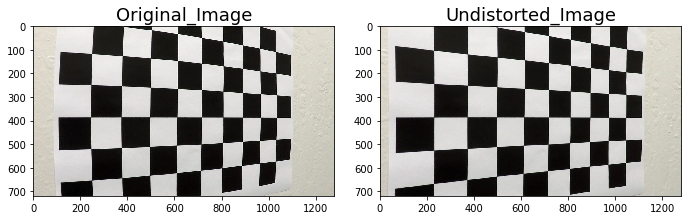

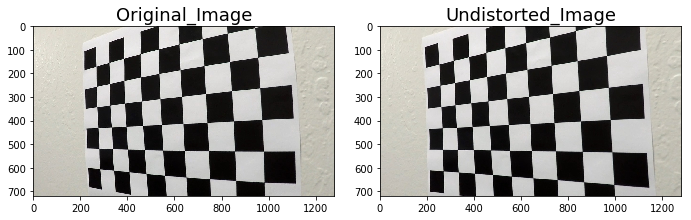

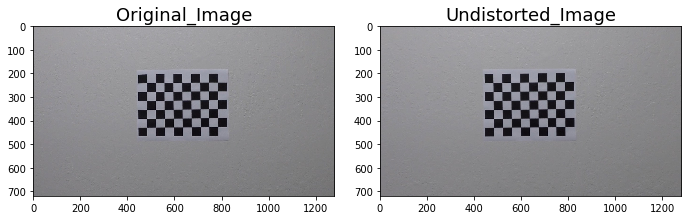

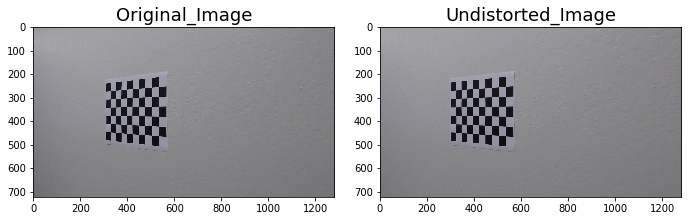

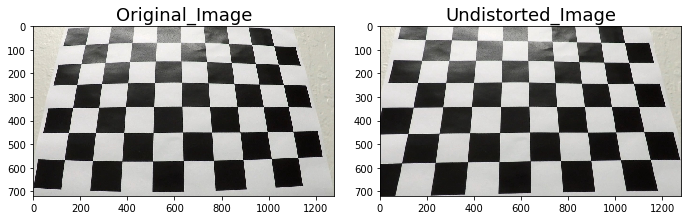

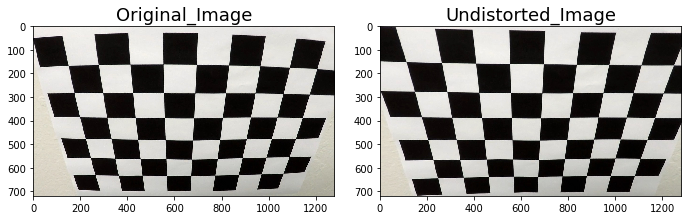

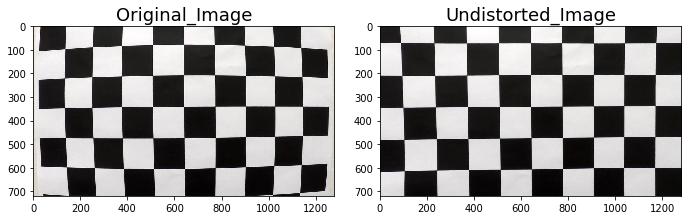

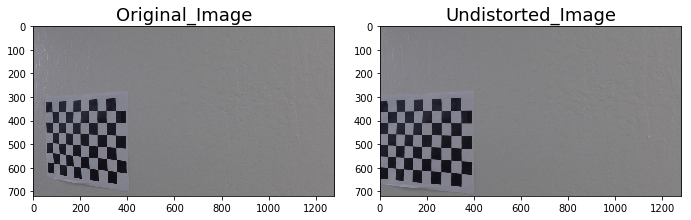

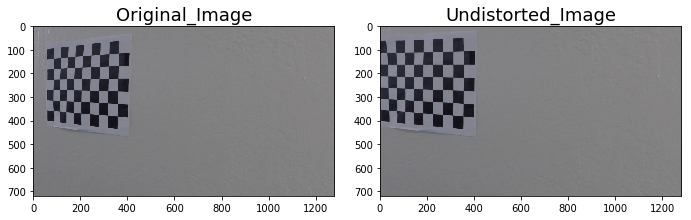

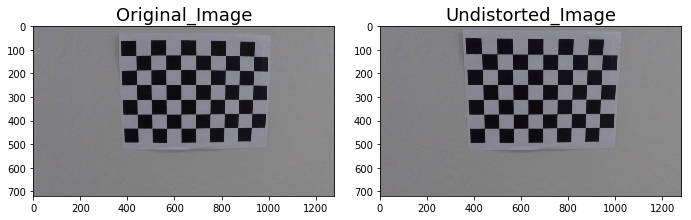

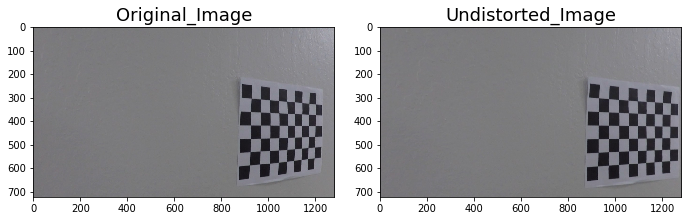

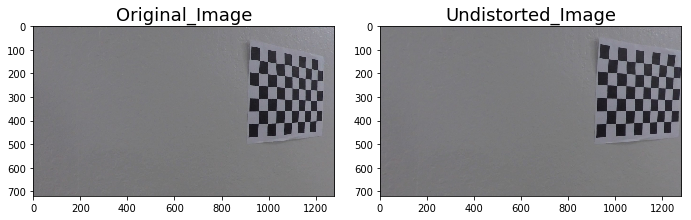

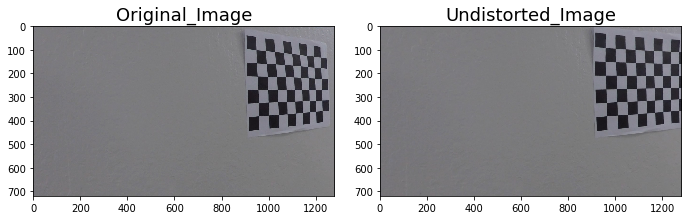

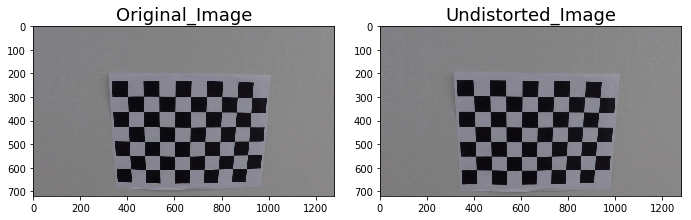

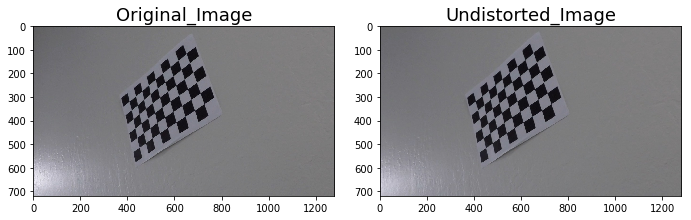

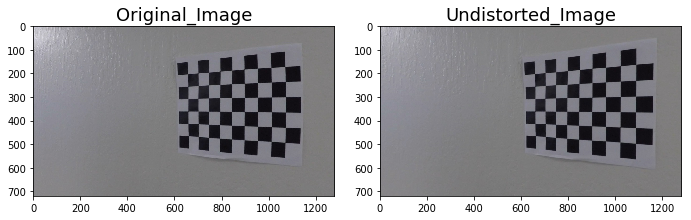

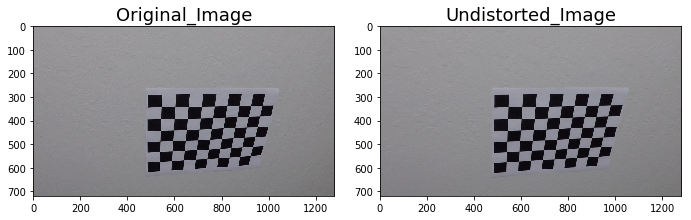

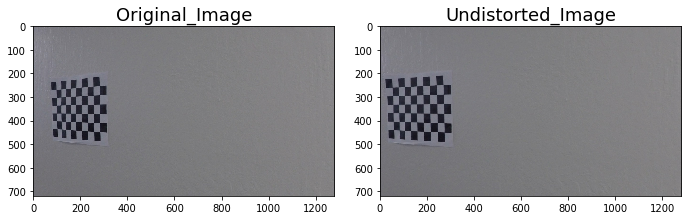

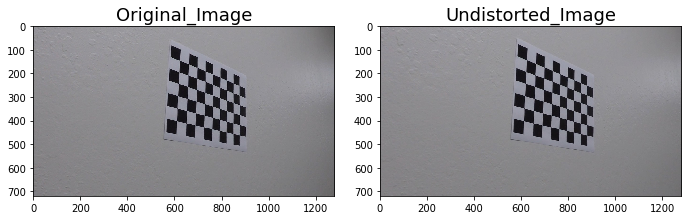

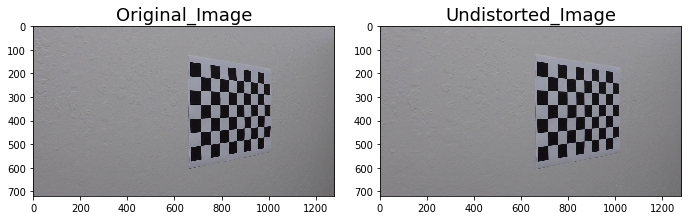

In [73]:
# prepare object points
nx = 9#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y

objpoints = []
imgpoints = []

#Function to calibrate camera and correct distotion 
def undistort(img, objpoints, imgpoints):
    img_size = (img.shape[1],img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

def ProcessCalImages():   
    #gather imgpoints and objpoints
    # Make a list of calibration images
    images = glob.glob('/Users/richasharma/UDACITY_SDC/CarND-Advanced-Lane-Lines/camera_cal/calibration*.jpg')
    objp = np.zeros((6*9,3),np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    #Calculate Imgpoints and Objpoints for camera caliberation and correct distortion
    for file in images:
        img = mpimg.imread(file)
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        # If found, draw corners
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
            cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

    #remove distortion from caliberation image and see the results
    for file in images:
        img = mpimg.imread(file)
        dst = undistort(img,objpoints,imgpoints)
        f,(ax1,ax2) = plt.subplots(1,2,figsize=(9,6))
        f.tight_layout()
        ax1.imshow(img)
        ax1.set_title("Original_Image",fontsize=18)
        ax2.imshow(dst)
        ax2.set_title("Undistorted_Image",fontsize=18)
        plt.subplots_adjust(left=0.,right=1,top=0.9,bottom=0.)
        plt.show()


ProcessCalImages()

Step2: Provide an example of a distortion corrected image
Step3: Steps to create thresholded binary: Use of color transform HLS and LBS and sobel gradients
Step 4: Perspective Transform and examples

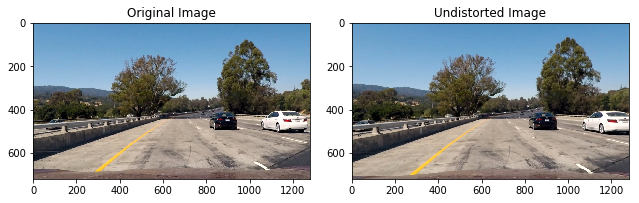

In [74]:
image ='/Users/richasharma/UDACITY_SDC/CarND-Advanced-Lane-Lines/test_images/test1.jpg'
img = mpimg.imread(image)
undist = undistort(img,objpoints,imgpoints)
f,(ax1,ax2) = plt.subplots(1,2,figsize=(9,6))
f.tight_layout()
ax1.set_title("Original Image",fontsize=12)
ax1.imshow(img,cmap='gray')
ax2.set_title("Undistorted Image",fontsize=12)
ax2.imshow(undist)
plt.show()

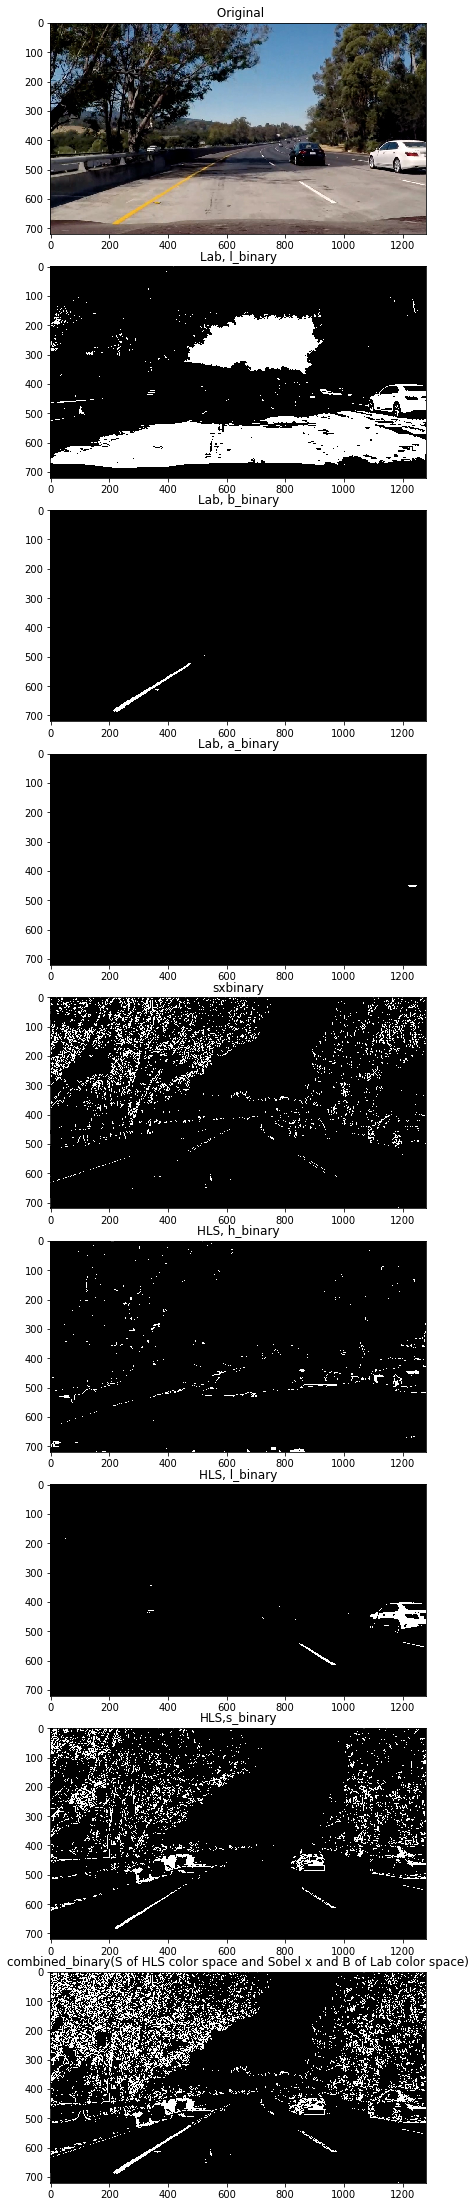

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [96]:
#Function to calculate color threshold using hls and Lab images 
#Sobel x is applied on the absolute value for gradient thresholding.
def Testthreshold(img):
    gry = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY).astype(np.float)
    hls = cv2.cvtColor(img,cv2.COLOR_RGB2HLS).astype(np.float)
    lab = cv2.cvtColor(img,cv2.COLOR_RGB2Lab).astype(np.float)
    
    f,axs = plt.subplots(9,1,figsize=(40,30))
    f.tight_layout() 
    
    #LAB L-channel
    lab_l = lab[:,:,0]
    l_binary = np.zeros_like(lab_l)
    l_binary[((lab_l > 165) & (lab_l <= 255))] = 1
      
    axs[0].imshow(img,cmap='gray')
    axs[0].set_title(" Original",fontsize=12)
    
    axs[1].imshow(l_binary,cmap='gray')
    axs[1].set_title("Lab, l_binary",fontsize=12)

    #LAB B-channel
    lab_b = lab[:,:,2]
    b_binary = np.zeros_like(lab_b)
    b_binary[((lab_b > 170) & (lab_b <= 255))] = 1
    
    axs[2].imshow(b_binary,cmap='gray')
    axs[2].set_title("Lab, b_binary",fontsize=12)

    #LAB A-channel
    lab_a = lab[:,:,1]
    a_binary = np.zeros_like(lab_a)
    a_binary[((lab_a > 165) & (lab_a <= 255))] = 1
    
    axs[3].imshow(a_binary,cmap='gray')
    axs[3].set_title("Lab, a_binary",fontsize=12)
    
    #Sobel x gradient threshold with absolute value
    sobelx = cv2.Sobel(gry, cv2.CV_64F,1,0)
    abs_sobelx = np.absolute(sobelx)
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[((scaled_sobel>=30)&(scaled_sobel<=100))] = 1
    
    axs[4].imshow(sxbinary,cmap='gray')
    axs[4].set_title("sxbinary",fontsize=12)    

    #HLS H-channel
    h_channel = hls[:,:,0]
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel > 170) & (h_channel <= 255)] = 1
    axs[5].imshow(h_binary,cmap='gray')
    axs[5].set_title("HLS, h_binary",fontsize=12)     
    
    #HLS L-channel
    l_channel = hls[:,:,1]
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel > 220) & (l_channel <= 255)] = 1
    axs[6].imshow(l_binary,cmap='gray')
    axs[6].set_title("HLS, l_binary",fontsize=12)    
    
    #HLS S-channel
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel > 190) & (s_channel <= 255)] = 1
    axs[7].imshow(s_binary,cmap='gray')
    axs[7].set_title("HLS,s_binary",fontsize=12)     
       
    combined_binary = np.zeros_like(s_binary)

    combined_binary[(s_binary == 1)|(sxbinary == 1)|(b_binary ==1)] = 1
    
    axs[8].imshow(combined_binary,cmap='gray')
    axs[8].set_title("combined_binary(S of HLS color space and Sobel x and B of Lab color space)",fontsize=12)  
    
    plt.subplots_adjust(left=0.,right=1.0,top=1.,bottom=0)
    plt.show()
    
    return combined_binary


image ='/Users/richasharma/UDACITY_SDC/CarND-Advanced-Lane-Lines/test_images/test5.jpg'
img = mpimg.imread(image)
Testthreshold(img)


In [97]:
# Fn. to calculate perspective transform of an image
def PerspectiveTransform(img):
    img_size = (img.shape[1],img.shape[0])
    src = np.float32([[585,460],[203,720],[1127,720],[695,460]])
    dst = np.float32([[320,0],[320,720],[960,720],[960,0]])
    M = cv2.getPerspectiveTransform(src,dst)
    warp = cv2.warpPerspective(img,M, img_size,flags=cv2.INTER_LINEAR)
    return warp

In [98]:
def threshold(img):
    
    gry = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY).astype(np.float)
    hls = cv2.cvtColor(img,cv2.COLOR_RGB2HLS).astype(np.float)
    lab = cv2.cvtColor(img,cv2.COLOR_RGB2Lab).astype(np.float)
    
    #LAB B-channel
    lab_b = lab[:,:,2]
    b_binary = np.zeros_like(lab_b)
    b_binary[((lab_b > 170) & (lab_b <= 255))] = 1
    
    #Sobel x gradient threshold
    sobelx = cv2.Sobel(gry, cv2.CV_64F,1,0)
    abs_sobelx = np.absolute(sobelx)
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[((scaled_sobel>=30)&(scaled_sobel<=100))] = 1
    
    #HLS S-channel
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel > 190) & (s_channel <= 255)] = 1   
       
    combined_binary = np.zeros_like(s_binary)
    combined_binary[(s_binary == 1)|(sxbinary == 1)|(b_binary == 1)] = 1
    
    return combined_binary

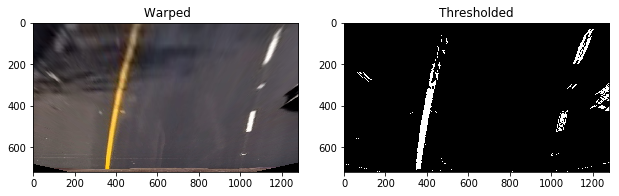

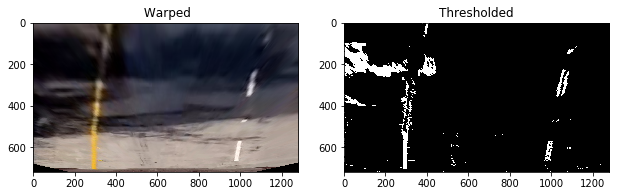

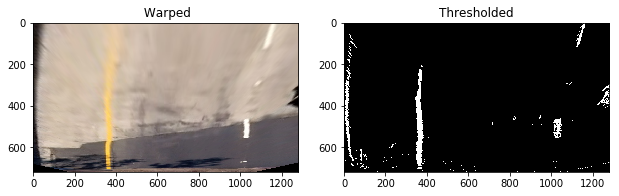

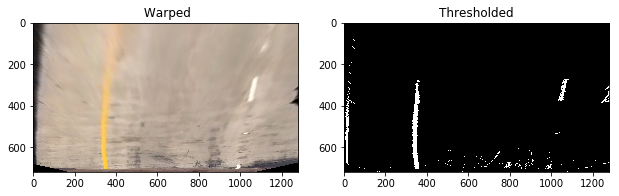

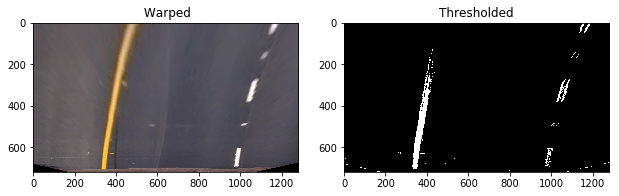

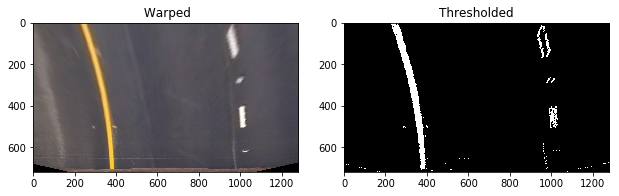

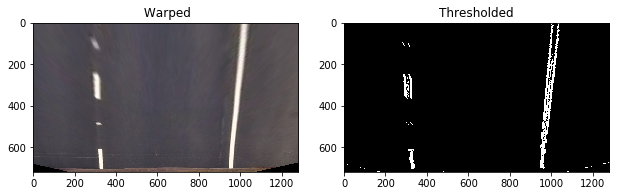

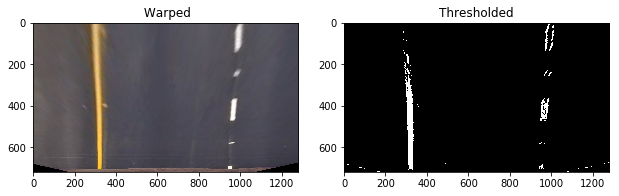

In [99]:
def ProcessThreshold():
    images = glob.glob('/Users/richasharma/UDACITY_SDC/CarND-Advanced-Lane-Lines/test_images/*.jpg')
    for file in images:
        img = mpimg.imread(file)
        warped = PerspectiveTransform(img)
        thresholded = threshold(warped)

        #Visualise pipeline
        f,axs = plt.subplots(1,2,figsize=(8,6))
        f.tight_layout()
        axs[0].imshow(warped,cmap='gray')
        axs[0].set_title(" Warped",fontsize=12)
        axs[1].imshow(thresholded,cmap='gray')
        axs[1].set_title("Thresholded",fontsize=12)
        plt.subplots_adjust(left=0.,right=1.0,top=1.0,bottom=0.)
        plt.show()
    

ProcessThreshold()

In [100]:
def ProcessPipeline(img):
    undist = undistort(img,objpoints,imgpoints)
    warped = PerspectiveTransform(undist)
    thresholded = threshold(warped)
    return thresholded,undist,warped

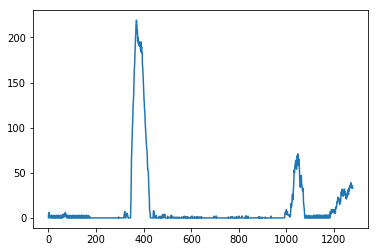

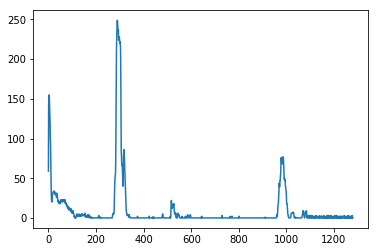

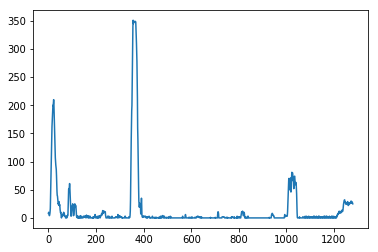

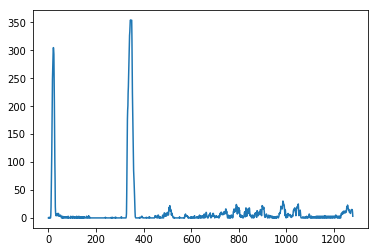

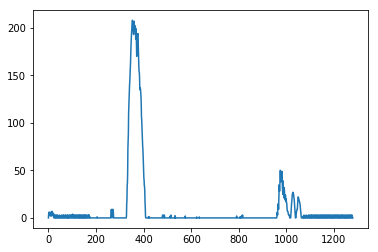

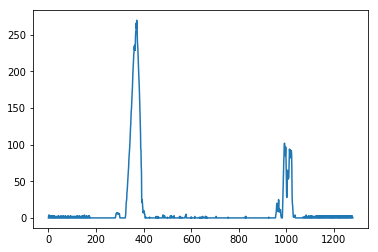

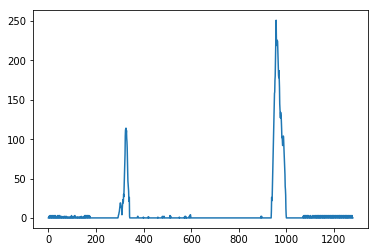

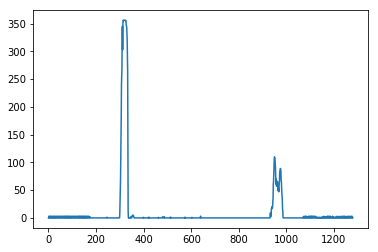

In [101]:
def ProcessTestImages():
    images = glob.glob('/Users/richasharma/UDACITY_SDC/CarND-Advanced-Lane-Lines/test_images/*.jpg')
    for i , file in enumerate(images):
        img = mpimg.imread(file)
        thresholded, undist, warped = ProcessPipeline(img)
        #Visualise histogram
        histogram = np.sum(thresholded[thresholded.shape[0]//2:,:], axis=0)
        plt.plot(histogram)
        plt.show()
ProcessTestImages()

Step5: Identify lane line pixels and fit their positions with a polynomial
Step6: Calculate radius of curvature of the lane and the position of the vehicle with respect to centre
Step7: warp back the fit from the rectified image back onto the original image and identify the lane boundaries

In [102]:
import sys
from queue import *
from collections import deque

class line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False 
        # x values of the last n fits of the line
        self.recent_xfitted = deque(maxlen = 10)
        #average x values of the fitted line over the last n iterations
        self.bestx = None
        #polynomial coefficients of the last n iterations
        self.recent_polyfit = deque(maxlen = 10)
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]
        #radius of curvature of the line in some units
        self.radius_of_curvature = None
        #distance of vehicle center from the lane centre in some units
        self.Offset = None
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float')
        #x values for detected line pixels
        self.allx = None
        #y values for detected line pixels
        self.ally = None
    def __del__(self):
        class_name = self.__class__.__name__

left_lane = line()
right_lane = line()

In [103]:
def FitPoly(binary_warped, undist):
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    #print(binary_warped.shape[0]//2)
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    print(leftx_base,midpoint,rightx_base)

    # Choose the number of sliding windows
    nwindows = 10
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # starting through the windows one by one
    for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    #Measure position of the vehicle
    ImageMidpoint = 640 
    XInterceptRightLane = right_fit[0]*720**2 + right_fit[1]*720 + right_fit[2]
    XInterceptLeftLane = left_fit[0]*720**2 + left_fit[1]*720 + left_fit[2]
    Diff = (XInterceptLeftLane + XInterceptRightLane)/2
    Offset = abs(640 - Diff)
    
    #Measure radius of curvature for each lane line
    ym_per_pix = 30/720 # meters per pixel in y dimension, lane length is 30 metres
    xm_per_pix = 3.7/700 # meters per pixel in x dimension, lane width is 12 ft = 3.7 metres
    y_eval = np.max(ploty)

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix  + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix  + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    #print(left_fit[0],left_fit[1],left_fit[2],right_fit[0],right_fit[1],right_fit[2])

    
    #Fill lane line parameters
    left_lane.detected = True 
    left_lane.recent_polyfit.append(left_fit)
    left_lane.recent_xfitted.append(left_fitx)
    left_lane.best_fit =  np.average(left_lane.recent_polyfit, axis=0)
    left_lane.bestx =  np.average(left_lane.recent_xfitted,axis = 0)
    left_lane.current_fit = left_fit
    left_lane.radius_of_curvature = left_curverad 
    left_lane.Offset = 640 - Diff
    left_lane.diffs = abs(left_lane.current_fit - left_lane.best_fit)
    left_lane.allx = left_fitx
    left_lane.ally = ploty
    
    right_lane.detected = True 
    right_lane.recent_polyfit.append(right_fit)
    right_lane.recent_xfitted.append(right_fitx)
    right_lane.best_fit =  np.average(right_lane.recent_polyfit, axis=0)
    right_lane.bestx =  np.average(right_lane.recent_xfitted,axis = 0)
    right_lane.current_fit = right_fit
    right_lane.radius_of_curvature = right_curverad
    right_lane.Offset = 640 - Diff
    right_lane.diffs = abs(right_lane.current_fit - right_lane.best_fit)
    right_lane.allx = right_fitx
    right_lane.ally = ploty
    

370 640 1048
856.490465782 m 350.057802897 m
[ 0.  0.  0.] [ 0.  0.  0.]


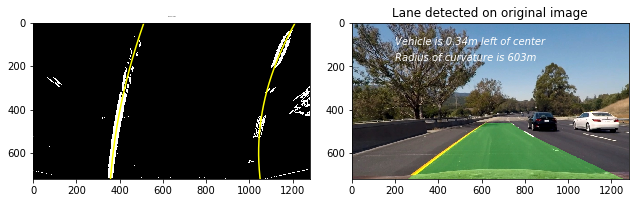

290 640 985
426.542786525 m 1287.83711307 m
[  1.70857085e-04   1.25861418e-01   3.99217831e+01] [  9.66964502e-05   3.86048428e-02   4.95983417e+01]


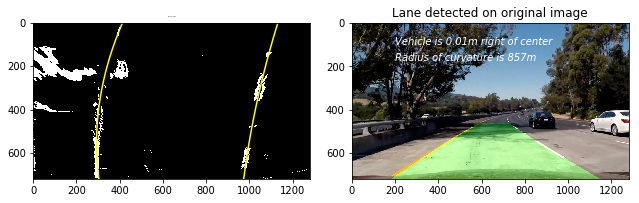

356 640 1023
3817.8007906 m 258.161540636 m
[  2.25832474e-04   1.46642863e-01   1.39549026e+01] [  1.63633503e-04   2.34984102e-01   6.11482967e+01]


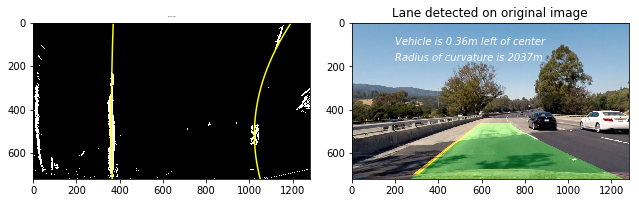

344 640 985
532.383518288 m 356.467677096 m
[  3.70469441e-05   1.56401031e-01   4.47924095e+01] [  7.64375737e-05   4.46328463e-02   7.33755771e-01]


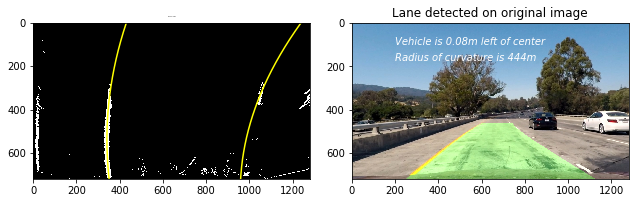

353 640 974
6268.8450149 m 870.74430312 m
[  1.88001180e-04   1.21889744e-01   2.01402016e+01] [  1.64735259e-04   8.53308699e-02   1.74014846e+01]


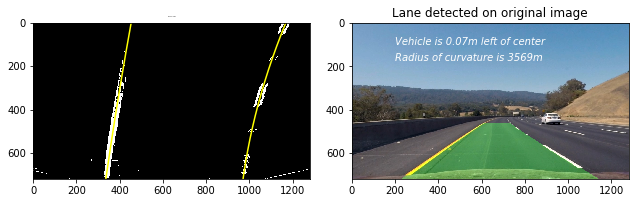

371 640 992
712.103175579 m 500.850480053 m
[  5.87346828e-04   6.94784174e-01   2.11288837e+02] [  3.51311148e-04   5.25088210e-01   1.63963089e+02]


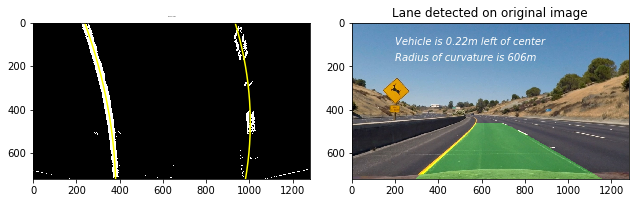

326 640 957
3362.74788974 m 936109.47732 m
[  2.22041348e-04   2.48302017e-01   1.08471920e+02] [  6.15762942e-05   1.45206256e-01   8.77639026e+01]


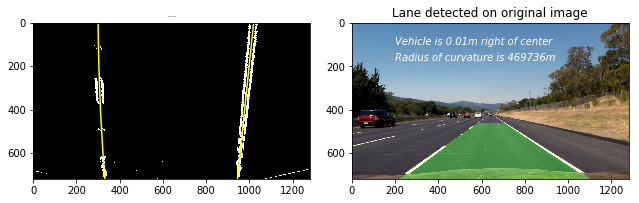

314 640 950
1474.51716899 m 21074.9163641 m
[  2.01259085e-04   2.52071334e-01   1.18695007e+02] [  1.94073487e-04   2.42660932e-01   9.68519936e+01]


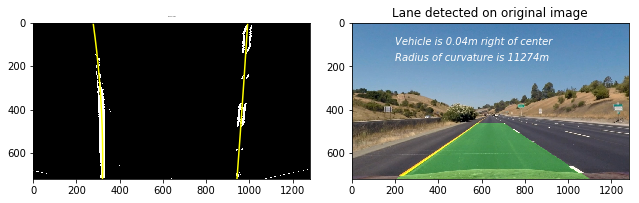

In [104]:
def VisualiseTestImages():
    images = glob.glob('/Users/richasharma/UDACITY_SDC/CarND-Advanced-Lane-Lines/test_images/*.jpg')
    for file in images:
        img = mpimg.imread(file)
        thresholded, undist, warped = ProcessPipeline(img)
        FitPoly(thresholded,undist)
        #Visualise the results by recasting warped image back to original image
        # Create an image to draw the lines on
        img_size = (thresholded.shape[1], thresholded.shape[0])
        src = np.float32([[585,460],[203,720],[1127,720],[695,460]])
        dst = np.float32([[320,0],[320,720],[960,720],[960,0]])
        
        Minv = cv2.getPerspectiveTransform(dst, src)

        warp_zero = np.zeros_like(thresholded).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

        # Recast the x and y points into usable format for cv2.fillPoly()
        pts_left = np.array([np.transpose(np.vstack([left_lane.allx, left_lane.ally]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_lane.allx, right_lane.ally])))])
        pts = np.hstack((pts_left, pts_right))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, Minv, (thresholded.shape[1], thresholded.shape[0])) 
        # Combine the result with the original image
        result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)

        print(right_lane.diffs,left_lane.diffs)
        
        f,(ax1,ax2) = plt.subplots(1,2,figsize=(9,6))
        f.tight_layout()
        ax1.plot(left_lane.allx, left_lane.ally, color='yellow')
        ax1.plot(right_lane.allx, right_lane.ally, color='yellow')
        ax1.set_xlim(0, 1280)
        ax1.set_ylim(720, 0)
        ax1.set_title("Warped Image",fontsize=1)
        ax1.imshow(thresholded,cmap='gray')
        ax2.set_title("Lane detected on original image",fontsize=12)
        ax2.imshow(result)
        offset = left_lane.Offset
        if (offset) < 0:
            ax2.text(200, 100, 'Vehicle is {:.2f}m left of center'.format(abs(offset)*3.7/700),style='italic', color='white', fontsize=10)
        else:
            ax2.text(200, 100, 'Vehicle is {:.2f}m right of center'.format(offset*3.7/700),style='italic', color='white', fontsize=10)
        ax2.text(200, 175, 'Radius of curvature is {}m'.format(int((left_lane.radius_of_curvature + right_lane.radius_of_curvature)/2)),style='italic', color='white', fontsize=10)
        plt.show()
        
VisualiseTestImages()        

## Process Video

In [105]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [106]:
def SearchPoly(binary_warped, undist):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_lane.best_fit[0]*(nonzeroy**2) + left_lane.best_fit[1]*nonzeroy + left_lane.best_fit[2] - margin)) & (nonzerox < (left_lane.best_fit[0]*(nonzeroy**2) + left_lane.best_fit[1]*nonzeroy + left_lane.best_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_lane.best_fit[0]*(nonzeroy**2) + right_lane.best_fit[1]*nonzeroy + right_lane.best_fit[2] - margin)) & (nonzerox < (right_lane.best_fit[0]*(nonzeroy**2) + right_lane.best_fit[1]*nonzeroy + right_lane.best_fit[2] + margin)))  
    if len(left_lane_inds > 50):
        # Again, extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]
        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        #print(left_fit[0],left_fit[1],left_fit[2],right_fit[0],right_fit[1],right_fit[2])
        #Measure position of the vehicle
        ImageMidpoint = 640 
        XInterceptRightLane = right_fit[0]*720**2 + right_fit[1]*720 + right_fit[2]
        XInterceptLeftLane = left_fit[0]*720**2 + left_fit[1]*720 + left_fit[2]
        ExpectedSeperation = abs(XInterceptRightLane - XInterceptLeftLane)
        Diff = (XInterceptLeftLane + XInterceptRightLane)/2
        Offset = abs(640 - Diff)

        #Measure radius of curvature for each lane line
        y_eval = np.max(ploty)
        ym_per_pix = 30./720 # meters per pixel in y dimension
        xm_per_pix = 3.7/700 # meters per pixel in x dimension
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix  + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix  + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

        # Now our radius of curvature is in meters
        print(left_curverad, 'm', right_curverad, 'm')
        
        #If sanity check fails do recalculate poly coefficients using sliding window
        # If lane seperation exceeds 700pixels(includes +/- margin) then histogram and sliding window is used again for lane line coefficient detection
        # If lanes radius of curvature difference exceeds 10000 metres (abnormally high)need recalculation of lane line coefficients.
        if ((ExpectedSeperation > 650 and ExpectedSeperation <= 725) or (int((left_curverad+right_curverad)/2) < 10000)):
            left_lane.detected = True 
            left_lane.recent_polyfit.append(left_fit)
            left_lane.recent_xfitted.append(left_fitx)
            left_lane.best_fit =  np.average(left_lane.recent_polyfit, axis=0)
            left_lane.bestx =  np.average(left_lane.recent_xfitted,axis = 0)
            left_lane.current_fit = left_fit#[np.array([False])]
            left_lane.radius_of_curvature = left_curverad 
            left_lane.Offset = 640 - Diff 
            left_lane.diffs = abs(left_lane.current_fit - left_lane.best_fit)
            left_lane.allx = left_fitx
            left_lane.ally = ploty

            right_lane.detected = True 
            right_lane.recent_polyfit.append(right_fit)
            right_lane.recent_xfitted.append(right_fitx)
            right_lane.best_fit =  np.average(right_lane.recent_polyfit, axis=0)
            right_lane.bestx =  np.average(right_lane.recent_xfitted,axis = 0)
            right_lane.current_fit = right_fit#[np.array([False])]
            right_lane.radius_of_curvature = right_curverad
            right_lane.Offset = 640 - Diff
            right_lane.diffs = abs(right_lane.current_fit - right_lane.best_fit)
            right_lane.allx = right_fitx
            right_lane.ally = ploty
        else:
            # retain the previous values
            left_lane.detected = False
            right_lane.detected = False
    else:
        left_lane.detected = False
        right_lane.detected = False

In [107]:
def ProcessVideoFrames(image):
    thresholded, undist, warped = ProcessPipeline(image)
    if((left_lane.detected == False) or (right_lane.detected == False)):
        FitPoly(thresholded,undist)
    else:
        SearchPoly(thresholded, undist)

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(thresholded).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_lane.bestx, left_lane.ally]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_lane.bestx, right_lane.ally])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    # Create an image to draw the lines on
    img_size = (thresholded.shape[1], thresholded.shape[0])
    src = np.float32([[585,460],[203,720],[1127,720],[695,460]])
    dst = np.float32([[320,0],[320,720],[960,720],[960,0]])
    Minv = cv2.getPerspectiveTransform(dst, src)
    newwarp = cv2.warpPerspective(color_warp, Minv, (thresholded.shape[1], thresholded.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    offset = left_lane.Offset
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    text = 'radius of curvature: ' + '{:04.2f}'.format(int((left_lane.radius_of_curvature + right_lane.radius_of_curvature)/2)) + 'm'
    cv2.putText(result, text, (40,70), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    offset =(offset)*(3.7/700) # in meters
    if offset > 0:
        text = '{:04.3f}'.format(offset) + 'm ' + 'right of center'
    elif offset < 0:
        text = '{:04.3f}'.format(abs(offset)) + 'm ' + 'left of center'
    cv2.putText(result, text, (40,120), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return result

In [108]:
left_lane = line()
right_lane = line()
white_output = '/Users/richasharma/UDACITY_SDC/CarND-Advanced-Lane-Lines/output.mp4'
clip1 = VideoFileClip("/Users/richasharma/UDACITY_SDC/CarND-Advanced-Lane-Lines/project_video.mp4")
white_clip = clip1.fl_image(ProcessVideoFrames) 
white_clip.write_videofile(white_output, audio=False)

368 640 1012
712.419067567 m 3072.87824591 m
[MoviePy] >>>> Building video /Users/richasharma/UDACITY_SDC/CarND-Advanced-Lane-Lines/output.mp4
[MoviePy] Writing video /Users/richasharma/UDACITY_SDC/CarND-Advanced-Lane-Lines/output.mp4





  0%|          | 0/1261 [00:00<?, ?it/s]


  0%|          | 1/1261 [00:00<18:44,  1.12it/s]

713.474987967 m 5220.85342927 m





  0%|          | 2/1261 [00:01<18:55,  1.11it/s]

679.559659773 m 2016.5024297 m





  0%|          | 3/1261 [00:02<18:52,  1.11it/s]

657.738253408 m 993.114952114 m





  0%|          | 4/1261 [00:03<18:46,  1.12it/s]

630.672117843 m 936.588771236 m





  0%|          | 5/1261 [00:04<18:39,  1.12it/s]

622.872487178 m 770.552374243 m





  0%|          | 6/1261 [00:05<18:37,  1.12it/s]

613.023371117 m 767.431023301 m





  1%|          | 7/1261 [00:06<18:35,  1.12it/s]

660.115502229 m 924.715684973 m





  1%|          | 8/1261 [00:07<18:26,  1.13it/s]

677.365895099 m 123923.628112 m





  1%|          | 9/1261 [00:08<18:27,  1.13it/s]

735.699920718 m 3915.58247732 m





  1%|          | 10/1261 [00:08<18:19,  1.14it/s]

738.890813446 m 3667.99243557 m





  1%|          | 11/1261 [00:09<18:17,  1.14it/s]

727.712462231 m 2533.14817508 m





  1%|          | 12/1261 [00:10<18:22,  1.13it/s]

814.527460748 m 2752.81252741 m





  1%|          | 13/1261 [00:11<18:22,  1.13it/s]

872.601492008 m 5160.67418338 m





  1%|          | 14/1261 [00:12<18:20,  1.13it/s]

895.985562055 m 3716.61081799 m





  1%|          | 15/1261 [00:13<18:30,  1.12it/s]

941.635823876 m 13267.2697853 m





  1%|▏         | 16/1261 [00:14<18:39,  1.11it/s]

892.155348545 m 1712.05870415 m





  1%|▏         | 17/1261 [00:15<18:41,  1.11it/s]

1049.72384294 m 1547.56195214 m





  1%|▏         | 18/1261 [00:16<18:43,  1.11it/s]

1097.73370599 m 1152.19845674 m





  2%|▏         | 19/1261 [00:16<18:37,  1.11it/s]

1161.59583871 m 1291.05814535 m





  2%|▏         | 20/1261 [00:17<18:25,  1.12it/s]

1270.82270976 m 2148.66835322 m





  2%|▏         | 21/1261 [00:18<18:17,  1.13it/s]

1377.67243358 m 4956.35353889 m





  2%|▏         | 22/1261 [00:19<18:13,  1.13it/s]

1384.89420388 m 12063.416183 m





  2%|▏         | 23/1261 [00:20<18:17,  1.13it/s]

1396.69235957 m 4373.48067649 m





  2%|▏         | 24/1261 [00:21<18:14,  1.13it/s]

1236.40370908 m 3275.19179636 m





  2%|▏         | 25/1261 [00:22<18:10,  1.13it/s]

1049.89938902 m 4036.52095742 m





  2%|▏         | 26/1261 [00:23<18:10,  1.13it/s]

1043.40926251 m 5340.07154758 m





  2%|▏         | 27/1261 [00:24<18:26,  1.12it/s]

928.401231272 m 3772.65825967 m





  2%|▏         | 28/1261 [00:24<18:26,  1.11it/s]

946.038011213 m 2093.1010656 m





  2%|▏         | 29/1261 [00:25<18:37,  1.10it/s]

845.867764656 m 7318.48544728 m





  2%|▏         | 30/1261 [00:26<18:32,  1.11it/s]

732.186028551 m 1293.06517506 m





  2%|▏         | 31/1261 [00:27<18:26,  1.11it/s]

741.743453975 m 987.515668281 m





  3%|▎         | 32/1261 [00:28<18:16,  1.12it/s]

670.412422428 m 913.552066035 m





  3%|▎         | 33/1261 [00:29<18:20,  1.12it/s]

692.091645899 m 1387.19505029 m





  3%|▎         | 34/1261 [00:30<18:20,  1.12it/s]

661.985274144 m 8830.97144651 m





  3%|▎         | 35/1261 [00:31<18:19,  1.11it/s]

625.634546396 m 12255.9713796 m





  3%|▎         | 36/1261 [00:32<18:20,  1.11it/s]

603.065605637 m 7471.02494455 m





  3%|▎         | 37/1261 [00:33<18:15,  1.12it/s]

567.504619115 m 11123.8903281 m





  3%|▎         | 38/1261 [00:33<18:10,  1.12it/s]

534.499517394 m 2802.0035041 m





  3%|▎         | 39/1261 [00:34<18:12,  1.12it/s]

514.638565452 m 2144.70787362 m





  3%|▎         | 40/1261 [00:35<18:11,  1.12it/s]

502.385847509 m 973.339754403 m





  3%|▎         | 41/1261 [00:36<18:09,  1.12it/s]

502.735661446 m 1100.64977437 m





  3%|▎         | 42/1261 [00:37<18:04,  1.12it/s]

510.001876405 m 1065.52093509 m





  3%|▎         | 43/1261 [00:38<18:05,  1.12it/s]

518.625981945 m 952.067369344 m





  3%|▎         | 44/1261 [00:39<18:02,  1.12it/s]

534.64038831 m 858.807703931 m





  4%|▎         | 45/1261 [00:40<17:58,  1.13it/s]

553.737222834 m 850.777440212 m





  4%|▎         | 46/1261 [00:41<17:56,  1.13it/s]

573.867740925 m 1328.56486902 m





  4%|▎         | 47/1261 [00:41<17:54,  1.13it/s]

603.654262536 m 2465.35962891 m





  4%|▍         | 48/1261 [00:42<17:50,  1.13it/s]

620.863191488 m 4376.72522115 m





  4%|▍         | 49/1261 [00:43<18:19,  1.10it/s]

661.026519919 m 3094.06588267 m





  4%|▍         | 50/1261 [00:44<18:13,  1.11it/s]

688.09178204 m 2892.56319159 m





  4%|▍         | 51/1261 [00:45<18:04,  1.12it/s]

742.925115583 m 4485.17663047 m





  4%|▍         | 52/1261 [00:46<18:04,  1.11it/s]

775.332581163 m 2886.1754813 m





  4%|▍         | 53/1261 [00:47<18:09,  1.11it/s]

751.935430868 m 1601.1732727 m





  4%|▍         | 54/1261 [00:48<18:12,  1.11it/s]

892.827186419 m 1030.89702525 m





  4%|▍         | 55/1261 [00:49<18:06,  1.11it/s]

1147.62938112 m 898.910617942 m





  4%|▍         | 56/1261 [00:50<18:06,  1.11it/s]

1280.71313604 m 912.940174675 m





  5%|▍         | 57/1261 [00:50<18:05,  1.11it/s]

1291.04878385 m 832.406897461 m





  5%|▍         | 58/1261 [00:51<18:07,  1.11it/s]

1376.07365873 m 1663.77234583 m





  5%|▍         | 59/1261 [00:52<18:13,  1.10it/s]

1128.74632151 m 5653.47394237 m





  5%|▍         | 60/1261 [00:53<18:05,  1.11it/s]

1008.08819452 m 2568.47006505 m





  5%|▍         | 61/1261 [00:54<18:10,  1.10it/s]

940.569728676 m 2260.72481821 m





  5%|▍         | 62/1261 [00:55<18:06,  1.10it/s]

854.943298176 m 1638.23920289 m





  5%|▍         | 63/1261 [00:56<17:56,  1.11it/s]

809.727423652 m 698.371897286 m





  5%|▌         | 64/1261 [00:57<17:52,  1.12it/s]

730.206751185 m 1632.83961038 m





  5%|▌         | 65/1261 [00:58<18:07,  1.10it/s]

741.510860544 m 1670.73581634 m





  5%|▌         | 66/1261 [00:59<18:00,  1.11it/s]

663.654021148 m 1545.6725389 m





  5%|▌         | 67/1261 [00:59<17:56,  1.11it/s]

653.186657783 m 1586.11065033 m





  5%|▌         | 68/1261 [01:00<17:47,  1.12it/s]

677.283168141 m 1559.0700657 m





  5%|▌         | 69/1261 [01:01<17:43,  1.12it/s]

747.209640218 m 1457.19705813 m





  6%|▌         | 70/1261 [01:02<17:47,  1.12it/s]

803.405346269 m 3308.87988276 m





  6%|▌         | 71/1261 [01:03<17:47,  1.12it/s]

821.343573784 m 1623.01901223 m





  6%|▌         | 72/1261 [01:04<17:51,  1.11it/s]

870.440100495 m 2338.0705714 m





  6%|▌         | 73/1261 [01:05<17:46,  1.11it/s]

873.476918734 m 3153.872106 m





  6%|▌         | 74/1261 [01:06<17:40,  1.12it/s]

988.961104359 m 22385.7091735 m





  6%|▌         | 75/1261 [01:07<17:44,  1.11it/s]

346 640 972
1033.94468313 m 1332.8939876 m





  6%|▌         | 76/1261 [01:08<17:40,  1.12it/s]

1127.45944958 m 19213.6724655 m





  6%|▌         | 77/1261 [01:08<17:39,  1.12it/s]

345 640 971
1111.88071477 m 1249.601887 m





  6%|▌         | 78/1261 [01:09<17:36,  1.12it/s]

1332.49360546 m 2876.90950669 m





  6%|▋         | 79/1261 [01:10<17:36,  1.12it/s]

1554.02420285 m 811.671773618 m





  6%|▋         | 80/1261 [01:11<17:30,  1.12it/s]

2236.29036513 m 874.903527196 m





  6%|▋         | 81/1261 [01:12<17:23,  1.13it/s]

3190.62375799 m 915.438484141 m





  7%|▋         | 82/1261 [01:13<17:26,  1.13it/s]

2231.91404995 m 856.335515632 m





  7%|▋         | 83/1261 [01:14<17:22,  1.13it/s]

1865.16120346 m 1015.31317154 m





  7%|▋         | 84/1261 [01:15<17:22,  1.13it/s]

1986.87993458 m 1445.99567317 m





  7%|▋         | 85/1261 [01:16<17:30,  1.12it/s]

1721.53517153 m 1541.2895032 m





  7%|▋         | 86/1261 [01:16<17:38,  1.11it/s]

1319.54078687 m 1441.55742156 m





  7%|▋         | 87/1261 [01:17<17:32,  1.12it/s]

998.665404148 m 1820.17897253 m





  7%|▋         | 88/1261 [01:18<17:32,  1.11it/s]

897.074784713 m 3194.64895452 m





  7%|▋         | 89/1261 [01:19<17:29,  1.12it/s]

829.075598672 m 3282.75833058 m





  7%|▋         | 90/1261 [01:20<17:31,  1.11it/s]

671.597277696 m 1105.6772832 m





  7%|▋         | 91/1261 [01:21<17:26,  1.12it/s]

722.155946149 m 1073.79245391 m





  7%|▋         | 92/1261 [01:22<17:25,  1.12it/s]

760.790596355 m 1284.63555918 m





  7%|▋         | 93/1261 [01:23<17:21,  1.12it/s]

794.152181654 m 863.279348952 m





  7%|▋         | 94/1261 [01:24<17:30,  1.11it/s]

750.649032376 m 827.046683226 m





  8%|▊         | 95/1261 [01:24<17:22,  1.12it/s]

799.506690634 m 890.669208511 m





  8%|▊         | 96/1261 [01:25<17:27,  1.11it/s]

845.108035163 m 1702.80866223 m





  8%|▊         | 97/1261 [01:26<17:23,  1.12it/s]

849.481362055 m 1631.26703455 m





  8%|▊         | 98/1261 [01:27<17:19,  1.12it/s]

855.29889831 m 1553.51466758 m





  8%|▊         | 99/1261 [01:28<17:21,  1.12it/s]

837.026421451 m 872.873615609 m





  8%|▊         | 100/1261 [01:29<17:22,  1.11it/s]

822.203277808 m 909.895897344 m





  8%|▊         | 101/1261 [01:30<17:18,  1.12it/s]

833.114152222 m 1390.45295766 m





  8%|▊         | 102/1261 [01:31<17:18,  1.12it/s]

790.449946936 m 994.901429514 m





  8%|▊         | 103/1261 [01:32<17:19,  1.11it/s]

775.642329153 m 715.76953691 m





  8%|▊         | 104/1261 [01:33<17:16,  1.12it/s]

757.719929667 m 777.191475162 m





  8%|▊         | 105/1261 [01:33<17:14,  1.12it/s]

809.394210263 m 846.558542684 m





  8%|▊         | 106/1261 [01:34<17:11,  1.12it/s]

836.832062597 m 821.145987111 m





  8%|▊         | 107/1261 [01:35<17:07,  1.12it/s]

885.766897271 m 848.813471368 m





  9%|▊         | 108/1261 [01:36<17:15,  1.11it/s]

800.67565489 m 773.079254614 m





  9%|▊         | 109/1261 [01:37<17:10,  1.12it/s]

812.032941033 m 877.498785379 m





  9%|▊         | 110/1261 [01:38<17:09,  1.12it/s]

792.555341847 m 809.777973986 m





  9%|▉         | 111/1261 [01:39<17:09,  1.12it/s]

783.701655467 m 1174.38867323 m





  9%|▉         | 112/1261 [01:40<17:11,  1.11it/s]

813.429374787 m 1023.76168901 m





  9%|▉         | 113/1261 [01:41<17:04,  1.12it/s]

747.646490757 m 1441.65207119 m





  9%|▉         | 114/1261 [01:42<17:07,  1.12it/s]

734.93243602 m 888.097984003 m





  9%|▉         | 115/1261 [01:42<17:21,  1.10it/s]

652.701107701 m 1140.53013077 m





  9%|▉         | 116/1261 [01:43<17:20,  1.10it/s]

641.824087884 m 702.876988371 m





  9%|▉         | 117/1261 [01:44<17:16,  1.10it/s]

640.215517599 m 731.040686577 m





  9%|▉         | 118/1261 [01:45<17:09,  1.11it/s]

626.028715106 m 705.132965207 m





  9%|▉         | 119/1261 [01:46<17:03,  1.12it/s]

624.86623246 m 579.641346853 m





 10%|▉         | 120/1261 [01:47<17:15,  1.10it/s]

593.138986697 m 571.077460177 m





 10%|▉         | 121/1261 [01:48<17:17,  1.10it/s]

604.301658287 m 694.706706583 m





 10%|▉         | 122/1261 [01:49<17:11,  1.10it/s]

630.815529945 m 889.255028411 m





 10%|▉         | 123/1261 [01:50<17:07,  1.11it/s]

595.18293416 m 807.442369811 m





 10%|▉         | 124/1261 [01:51<17:06,  1.11it/s]

602.419909742 m 957.890655223 m





 10%|▉         | 125/1261 [01:51<17:03,  1.11it/s]

585.765904994 m 887.534771704 m





 10%|▉         | 126/1261 [01:52<17:02,  1.11it/s]

639.108762957 m 1129.65405064 m





 10%|█         | 127/1261 [01:53<17:10,  1.10it/s]

627.481570752 m 758.195999203 m





 10%|█         | 128/1261 [01:54<17:06,  1.10it/s]

647.080408806 m 775.068359775 m





 10%|█         | 129/1261 [01:55<17:02,  1.11it/s]

633.203279448 m 808.893542766 m





 10%|█         | 130/1261 [01:56<17:01,  1.11it/s]

657.595875258 m 707.275420179 m





 10%|█         | 131/1261 [01:57<16:56,  1.11it/s]

711.618591337 m 645.066097568 m





 10%|█         | 132/1261 [01:58<16:50,  1.12it/s]

728.140280482 m 704.131109479 m





 11%|█         | 133/1261 [01:59<17:10,  1.09it/s]

773.631772049 m 693.866285725 m





 11%|█         | 134/1261 [02:00<17:29,  1.07it/s]

775.234710476 m 1220.6066357 m





 11%|█         | 135/1261 [02:01<17:16,  1.09it/s]

791.072310239 m 878.674224717 m





 11%|█         | 136/1261 [02:02<17:12,  1.09it/s]

826.549728893 m 1167.10393716 m





 11%|█         | 137/1261 [02:02<17:08,  1.09it/s]

831.874722036 m 1223.12810271 m





 11%|█         | 138/1261 [02:03<16:56,  1.11it/s]

872.08939379 m 1855.46023657 m





 11%|█         | 139/1261 [02:04<16:48,  1.11it/s]

866.790017351 m 4148.05863688 m





 11%|█         | 140/1261 [02:05<16:40,  1.12it/s]

906.941069731 m 93895.9118514 m





 11%|█         | 141/1261 [02:06<16:43,  1.12it/s]

365 640 1003
884.104378465 m 1573.44236154 m





 11%|█▏        | 142/1261 [02:07<16:41,  1.12it/s]

954.777036761 m 1731.48968428 m





 11%|█▏        | 143/1261 [02:08<16:42,  1.12it/s]

927.791497376 m 1554.92448114 m





 11%|█▏        | 144/1261 [02:09<16:44,  1.11it/s]

928.474051951 m 1147.34728054 m





 11%|█▏        | 145/1261 [02:10<16:38,  1.12it/s]

969.269414224 m 1161.13055775 m





 12%|█▏        | 146/1261 [02:10<16:28,  1.13it/s]

943.995750797 m 2541.01227372 m





 12%|█▏        | 147/1261 [02:11<16:27,  1.13it/s]

1072.42264725 m 3064.34182592 m





 12%|█▏        | 148/1261 [02:12<16:25,  1.13it/s]

962.95058044 m 5035.45230267 m





 12%|█▏        | 149/1261 [02:13<16:26,  1.13it/s]

991.190000026 m 3958.39644235 m





 12%|█▏        | 150/1261 [02:14<16:33,  1.12it/s]

991.414560885 m 1706.22801602 m





 12%|█▏        | 151/1261 [02:15<16:31,  1.12it/s]

1013.90282148 m 6535.24055232 m





 12%|█▏        | 152/1261 [02:16<16:29,  1.12it/s]

995.807792298 m 2621.01887662 m





 12%|█▏        | 153/1261 [02:17<16:24,  1.13it/s]

895.858333094 m 930.648648681 m





 12%|█▏        | 154/1261 [02:18<16:20,  1.13it/s]

959.234547785 m 934.785074757 m





 12%|█▏        | 155/1261 [02:18<16:17,  1.13it/s]

1077.90768865 m 1007.48267785 m





 12%|█▏        | 156/1261 [02:19<16:16,  1.13it/s]

965.43676394 m 928.261212964 m





 12%|█▏        | 157/1261 [02:20<16:14,  1.13it/s]

929.6403489 m 790.637964703 m





 13%|█▎        | 158/1261 [02:21<16:13,  1.13it/s]

823.219067818 m 1085.86359278 m





 13%|█▎        | 159/1261 [02:22<16:09,  1.14it/s]

868.337669053 m 3864.50299233 m





 13%|█▎        | 160/1261 [02:23<16:03,  1.14it/s]

808.302375812 m 3087.91593125 m





 13%|█▎        | 161/1261 [02:24<16:15,  1.13it/s]

807.315653893 m 3581.01336553 m





 13%|█▎        | 162/1261 [02:25<16:06,  1.14it/s]

776.576216644 m 4882.76406267 m





 13%|█▎        | 163/1261 [02:25<16:00,  1.14it/s]

739.556752517 m 2233.93488649 m





 13%|█▎        | 164/1261 [02:26<16:02,  1.14it/s]

734.226630561 m 29542.3367037 m





 13%|█▎        | 165/1261 [02:27<16:05,  1.13it/s]

728.812923569 m 1479.03874308 m





 13%|█▎        | 166/1261 [02:28<16:02,  1.14it/s]

714.828470802 m 1757.92357833 m





 13%|█▎        | 167/1261 [02:29<16:01,  1.14it/s]

653.538116434 m 1208.33575807 m





 13%|█▎        | 168/1261 [02:30<16:08,  1.13it/s]

789.187369374 m 1517.04862817 m





 13%|█▎        | 169/1261 [02:31<16:15,  1.12it/s]

860.78151705 m 968.507438498 m





 13%|█▎        | 170/1261 [02:32<16:08,  1.13it/s]

837.189060578 m 1155.30291346 m





 14%|█▎        | 171/1261 [02:33<16:04,  1.13it/s]

1022.73385492 m 1365.91730929 m





 14%|█▎        | 172/1261 [02:33<16:05,  1.13it/s]

1067.14820351 m 2484.24240113 m





 14%|█▎        | 173/1261 [02:34<16:18,  1.11it/s]

1072.49236349 m 1950.09487628 m





 14%|█▍        | 174/1261 [02:35<16:11,  1.12it/s]

987.251425356 m 757.475889594 m





 14%|█▍        | 175/1261 [02:36<16:07,  1.12it/s]

902.054134957 m 734.28320352 m





 14%|█▍        | 176/1261 [02:37<16:03,  1.13it/s]

866.863055348 m 480.413116242 m





 14%|█▍        | 177/1261 [02:38<16:15,  1.11it/s]

939.510939171 m 527.154630537 m





 14%|█▍        | 178/1261 [02:39<16:10,  1.12it/s]

919.315806751 m 510.616300362 m





 14%|█▍        | 179/1261 [02:40<16:12,  1.11it/s]

867.973065729 m 465.344710689 m





 14%|█▍        | 180/1261 [02:41<16:15,  1.11it/s]

879.446846266 m 523.748282474 m





 14%|█▍        | 181/1261 [02:42<16:13,  1.11it/s]

771.681941641 m 433.801978626 m





 14%|█▍        | 182/1261 [02:42<16:04,  1.12it/s]

774.815195026 m 455.341819764 m





 15%|█▍        | 183/1261 [02:43<16:02,  1.12it/s]

728.013181355 m 495.967170156 m





 15%|█▍        | 184/1261 [02:44<16:00,  1.12it/s]

623.968975758 m 778.375704609 m





 15%|█▍        | 185/1261 [02:45<16:02,  1.12it/s]

570.684025119 m 718.298504784 m





 15%|█▍        | 186/1261 [02:46<16:02,  1.12it/s]

490.848218218 m 666.579454932 m





 15%|█▍        | 187/1261 [02:47<15:57,  1.12it/s]

479.505120751 m 655.71862361 m





 15%|█▍        | 188/1261 [02:48<15:57,  1.12it/s]

476.61864332 m 675.683006774 m





 15%|█▍        | 189/1261 [02:49<15:54,  1.12it/s]

486.312992436 m 613.183288726 m





 15%|█▌        | 190/1261 [02:50<16:01,  1.11it/s]

495.686647674 m 550.910356527 m





 15%|█▌        | 191/1261 [02:50<15:55,  1.12it/s]

500.977235551 m 575.62096849 m





 15%|█▌        | 192/1261 [02:51<15:53,  1.12it/s]

547.413279196 m 592.745765497 m





 15%|█▌        | 193/1261 [02:52<15:48,  1.13it/s]

555.716864976 m 633.640348727 m





 15%|█▌        | 194/1261 [02:53<15:46,  1.13it/s]

601.132763557 m 608.671029133 m





 15%|█▌        | 195/1261 [02:54<15:54,  1.12it/s]

628.808080589 m 764.3122318 m





 16%|█▌        | 196/1261 [02:55<15:53,  1.12it/s]

707.944474093 m 1944.65052343 m





 16%|█▌        | 197/1261 [02:56<15:48,  1.12it/s]

781.586598305 m 4346.33795213 m





 16%|█▌        | 198/1261 [02:57<15:40,  1.13it/s]

851.417497349 m 2345.32341972 m





 16%|█▌        | 199/1261 [02:58<15:36,  1.13it/s]

936.425371329 m 1109.99867657 m





 16%|█▌        | 200/1261 [02:58<15:29,  1.14it/s]

950.71676989 m 2585.53724844 m





 16%|█▌        | 201/1261 [02:59<15:29,  1.14it/s]

1031.74741879 m 8863.89429925 m





 16%|█▌        | 202/1261 [03:00<15:26,  1.14it/s]

962.91734219 m 1361.11359288 m





 16%|█▌        | 203/1261 [03:01<15:25,  1.14it/s]

915.070668763 m 1373.1712623 m





 16%|█▌        | 204/1261 [03:02<15:25,  1.14it/s]

887.908080664 m 929.745477019 m





 16%|█▋        | 205/1261 [03:03<15:24,  1.14it/s]

852.526403528 m 906.494410125 m





 16%|█▋        | 206/1261 [03:04<15:22,  1.14it/s]

825.489282069 m 768.955619268 m





 16%|█▋        | 207/1261 [03:05<15:24,  1.14it/s]

709.595758648 m 737.699557421 m





 16%|█▋        | 208/1261 [03:05<15:29,  1.13it/s]

686.530873928 m 1539.02474112 m





 17%|█▋        | 209/1261 [03:06<15:33,  1.13it/s]

687.247523401 m 3721.82952503 m





 17%|█▋        | 210/1261 [03:07<15:29,  1.13it/s]

697.061802315 m 2260.59870629 m





 17%|█▋        | 211/1261 [03:08<15:29,  1.13it/s]

723.724976788 m 1223.16371335 m





 17%|█▋        | 212/1261 [03:09<15:40,  1.12it/s]

689.877200269 m 1267.21449545 m





 17%|█▋        | 213/1261 [03:10<15:34,  1.12it/s]

673.594048529 m 2308.44026893 m





 17%|█▋        | 214/1261 [03:11<15:32,  1.12it/s]

638.38979908 m 4134.18809742 m





 17%|█▋        | 215/1261 [03:12<15:27,  1.13it/s]

607.941890744 m 1289.7330369 m





 17%|█▋        | 216/1261 [03:13<15:38,  1.11it/s]

608.761813517 m 988.387184634 m





 17%|█▋        | 217/1261 [03:13<15:31,  1.12it/s]

630.90594615 m 871.079189927 m





 17%|█▋        | 218/1261 [03:14<15:31,  1.12it/s]

643.561104823 m 967.774978209 m





 17%|█▋        | 219/1261 [03:15<15:29,  1.12it/s]

637.01338819 m 897.090765622 m





 17%|█▋        | 220/1261 [03:16<15:36,  1.11it/s]

694.488791498 m 1478.30049598 m





 18%|█▊        | 221/1261 [03:17<15:28,  1.12it/s]

775.647474425 m 2875.66131975 m





 18%|█▊        | 222/1261 [03:18<15:22,  1.13it/s]

795.913654116 m 1622.09770265 m





 18%|█▊        | 223/1261 [03:19<15:21,  1.13it/s]

820.53816419 m 1332.94559472 m





 18%|█▊        | 224/1261 [03:20<15:17,  1.13it/s]

793.755587549 m 5605.09073168 m





 18%|█▊        | 225/1261 [03:21<15:18,  1.13it/s]

815.21708422 m 2035.24729776 m





 18%|█▊        | 226/1261 [03:21<15:21,  1.12it/s]

786.904524292 m 1862.08517947 m





 18%|█▊        | 227/1261 [03:22<15:26,  1.12it/s]

842.046208752 m 1239.86316825 m





 18%|█▊        | 228/1261 [03:23<15:33,  1.11it/s]

912.521144775 m 1008.1981836 m





 18%|█▊        | 229/1261 [03:24<15:32,  1.11it/s]

1058.25360069 m 1215.11327255 m





 18%|█▊        | 230/1261 [03:25<15:29,  1.11it/s]

1165.63464241 m 1129.82192378 m





 18%|█▊        | 231/1261 [03:26<15:25,  1.11it/s]

1114.23662547 m 869.536448559 m





 18%|█▊        | 232/1261 [03:27<15:24,  1.11it/s]

1197.47118105 m 969.54875078 m





 18%|█▊        | 233/1261 [03:28<15:19,  1.12it/s]

1180.11167083 m 1138.92795983 m





 19%|█▊        | 234/1261 [03:29<15:33,  1.10it/s]

1184.99916285 m 1626.4595741 m





 19%|█▊        | 235/1261 [03:30<15:24,  1.11it/s]

1052.01691647 m 1007.73731649 m





 19%|█▊        | 236/1261 [03:30<15:16,  1.12it/s]

939.44785644 m 766.003128107 m





 19%|█▉        | 237/1261 [03:31<15:12,  1.12it/s]

897.707373628 m 684.469193325 m





 19%|█▉        | 238/1261 [03:32<15:08,  1.13it/s]

800.234163899 m 658.398380688 m





 19%|█▉        | 239/1261 [03:33<15:08,  1.13it/s]

831.733182433 m 559.430177673 m





 19%|█▉        | 240/1261 [03:34<15:05,  1.13it/s]

865.681992075 m 675.526572594 m





 19%|█▉        | 241/1261 [03:35<15:09,  1.12it/s]

901.810429342 m 621.715227327 m





 19%|█▉        | 242/1261 [03:36<15:11,  1.12it/s]

960.948947956 m 663.902067013 m





 19%|█▉        | 243/1261 [03:37<15:09,  1.12it/s]

911.332150887 m 543.148363124 m





 19%|█▉        | 244/1261 [03:38<15:05,  1.12it/s]

866.032105629 m 517.037866801 m





 19%|█▉        | 245/1261 [03:38<15:03,  1.12it/s]

776.829467183 m 533.163737342 m





 20%|█▉        | 246/1261 [03:39<14:58,  1.13it/s]

734.649471166 m 609.316705424 m





 20%|█▉        | 247/1261 [03:40<14:57,  1.13it/s]

680.341963846 m 465.535427267 m





 20%|█▉        | 248/1261 [03:41<14:55,  1.13it/s]

646.711361713 m 483.241949155 m





 20%|█▉        | 249/1261 [03:42<14:57,  1.13it/s]

718.510918473 m 446.661164677 m





 20%|█▉        | 250/1261 [03:43<14:56,  1.13it/s]

693.190396587 m 530.068777516 m





 20%|█▉        | 251/1261 [03:44<14:54,  1.13it/s]

716.681935379 m 614.756943713 m





 20%|█▉        | 252/1261 [03:45<14:53,  1.13it/s]

791.021225056 m 758.458715174 m





 20%|██        | 253/1261 [03:46<14:51,  1.13it/s]

846.635280789 m 590.293807223 m





 20%|██        | 254/1261 [03:46<14:51,  1.13it/s]

975.951848405 m 627.84405976 m





 20%|██        | 255/1261 [03:47<14:52,  1.13it/s]

821.608283088 m 595.020272939 m





 20%|██        | 256/1261 [03:48<14:50,  1.13it/s]

902.664285156 m 608.946755059 m





 20%|██        | 257/1261 [03:49<14:48,  1.13it/s]

877.643896467 m 444.795445086 m





 20%|██        | 258/1261 [03:50<14:46,  1.13it/s]

833.887126964 m 418.456429417 m





 21%|██        | 259/1261 [03:51<14:45,  1.13it/s]

796.962112823 m 472.590104253 m





 21%|██        | 260/1261 [03:52<14:54,  1.12it/s]

780.619805536 m 523.522107896 m





 21%|██        | 261/1261 [03:53<15:16,  1.09it/s]

852.574637656 m 648.820798226 m





 21%|██        | 262/1261 [03:54<15:19,  1.09it/s]

876.907379748 m 551.691760177 m





 21%|██        | 263/1261 [03:55<15:06,  1.10it/s]

876.948157528 m 570.150940067 m





 21%|██        | 264/1261 [03:55<14:57,  1.11it/s]

863.416726904 m 576.487785055 m





 21%|██        | 265/1261 [03:56<14:48,  1.12it/s]

1028.96781775 m 714.472122418 m





 21%|██        | 266/1261 [03:57<14:49,  1.12it/s]

1000.77724474 m 806.018630539 m





 21%|██        | 267/1261 [03:58<14:48,  1.12it/s]

1062.04142881 m 631.49924761 m





 21%|██▏       | 268/1261 [03:59<14:47,  1.12it/s]

1035.24810676 m 666.904224874 m





 21%|██▏       | 269/1261 [04:00<14:52,  1.11it/s]

1045.71734725 m 683.05609311 m





 21%|██▏       | 270/1261 [04:01<14:44,  1.12it/s]

868.802403553 m 1227.72048409 m





 21%|██▏       | 271/1261 [04:02<14:43,  1.12it/s]

901.423826121 m 903.110631908 m





 22%|██▏       | 272/1261 [04:03<14:39,  1.12it/s]

845.487285655 m 839.922792464 m





 22%|██▏       | 273/1261 [04:03<14:33,  1.13it/s]

818.820379075 m 1058.53844169 m





 22%|██▏       | 274/1261 [04:04<14:31,  1.13it/s]

735.360531857 m 719.755109514 m





 22%|██▏       | 275/1261 [04:05<14:29,  1.13it/s]

808.492746211 m 742.991466075 m





 22%|██▏       | 276/1261 [04:06<14:27,  1.14it/s]

841.11827709 m 705.114207751 m





 22%|██▏       | 277/1261 [04:07<14:25,  1.14it/s]

906.530722162 m 692.151327066 m





 22%|██▏       | 278/1261 [04:08<14:38,  1.12it/s]

846.892557597 m 676.192340528 m





 22%|██▏       | 279/1261 [04:09<14:35,  1.12it/s]

1128.48009063 m 705.345695143 m





 22%|██▏       | 280/1261 [04:10<14:38,  1.12it/s]

880.494207424 m 715.222534677 m





 22%|██▏       | 281/1261 [04:11<14:32,  1.12it/s]

857.33172368 m 982.831107869 m





 22%|██▏       | 282/1261 [04:11<14:30,  1.12it/s]

830.354752882 m 1158.79009995 m





 22%|██▏       | 283/1261 [04:12<14:28,  1.13it/s]

824.317560729 m 1162.44749896 m





 23%|██▎       | 284/1261 [04:13<14:26,  1.13it/s]

860.889227383 m 1119.80671752 m





 23%|██▎       | 285/1261 [04:14<14:24,  1.13it/s]

1259.41396286 m 1146.14522104 m





 23%|██▎       | 286/1261 [04:15<14:21,  1.13it/s]

1059.40124948 m 1014.88910788 m





 23%|██▎       | 287/1261 [04:16<14:21,  1.13it/s]

1090.72731913 m 978.659245836 m





 23%|██▎       | 288/1261 [04:17<14:19,  1.13it/s]

920.157090189 m 966.622382511 m





 23%|██▎       | 289/1261 [04:18<14:17,  1.13it/s]

1438.58821728 m 1066.23817507 m





 23%|██▎       | 290/1261 [04:18<14:13,  1.14it/s]

1718.42423924 m 1080.20767249 m





 23%|██▎       | 291/1261 [04:19<14:21,  1.13it/s]

1818.69921681 m 984.573431956 m





 23%|██▎       | 292/1261 [04:20<14:21,  1.12it/s]

2022.7502851 m 1037.13838166 m





 23%|██▎       | 293/1261 [04:21<14:21,  1.12it/s]

1743.61809002 m 972.710763284 m





 23%|██▎       | 294/1261 [04:22<14:18,  1.13it/s]

1741.96004918 m 1283.90755456 m





 23%|██▎       | 295/1261 [04:23<14:17,  1.13it/s]

1796.88134371 m 2650.25489165 m





 23%|██▎       | 296/1261 [04:24<14:24,  1.12it/s]

1732.89618547 m 1698.86977057 m





 24%|██▎       | 297/1261 [04:25<14:18,  1.12it/s]

1659.12513222 m 1920.76411129 m





 24%|██▎       | 298/1261 [04:26<14:27,  1.11it/s]

1580.51138902 m 2002.59015549 m





 24%|██▎       | 299/1261 [04:27<14:22,  1.11it/s]

1502.26272748 m 980.998124863 m





 24%|██▍       | 300/1261 [04:27<14:23,  1.11it/s]

1432.1649575 m 968.698242213 m





 24%|██▍       | 301/1261 [04:28<14:18,  1.12it/s]

2847.23728618 m 1236.96981415 m





 24%|██▍       | 302/1261 [04:29<14:14,  1.12it/s]

3317.14790265 m 1575.63800466 m





 24%|██▍       | 303/1261 [04:30<14:08,  1.13it/s]

3914.28109742 m 1346.39815998 m





 24%|██▍       | 304/1261 [04:31<14:08,  1.13it/s]

5358.05115835 m 1492.75204848 m





 24%|██▍       | 305/1261 [04:32<14:13,  1.12it/s]

2853.99612309 m 3517.56535741 m





 24%|██▍       | 306/1261 [04:33<14:14,  1.12it/s]

3279.78694898 m 1345.25031435 m





 24%|██▍       | 307/1261 [04:34<14:28,  1.10it/s]

3279.80786607 m 1290.13961104 m





 24%|██▍       | 308/1261 [04:35<14:20,  1.11it/s]

2891.31369091 m 1311.01569945 m





 25%|██▍       | 309/1261 [04:36<14:19,  1.11it/s]

3678.70160584 m 1403.44017391 m





 25%|██▍       | 310/1261 [04:36<14:10,  1.12it/s]

2218.09133547 m 1685.4975363 m





 25%|██▍       | 311/1261 [04:37<14:09,  1.12it/s]

2863.65891632 m 8365.14642851 m





 25%|██▍       | 312/1261 [04:38<14:12,  1.11it/s]

3165.47455547 m 37953.6632849 m





 25%|██▍       | 313/1261 [04:39<14:16,  1.11it/s]

352 640 982
5200.69798545 m 8962.65729123 m





 25%|██▍       | 314/1261 [04:40<14:14,  1.11it/s]

29451.77334 m 112423.830668 m





 25%|██▍       | 315/1261 [04:41<14:18,  1.10it/s]

353 640 989
8554.52882508 m 48945.6063804 m





 25%|██▌       | 316/1261 [04:42<14:18,  1.10it/s]

22550.7128151 m 3496.18127463 m





 25%|██▌       | 317/1261 [04:43<14:23,  1.09it/s]

353 640 980
7538.15254262 m 3790.68307305 m





 25%|██▌       | 318/1261 [04:44<14:12,  1.11it/s]

29285.188515 m 2603.8887232 m





 25%|██▌       | 319/1261 [04:45<14:18,  1.10it/s]

355 640 979
32347.2202728 m 1377.64659427 m





 25%|██▌       | 320/1261 [04:45<14:11,  1.11it/s]

6135.37617766 m 8421.38402253 m





 25%|██▌       | 321/1261 [04:46<14:07,  1.11it/s]

48965.6756327 m 2447.21042908 m





 26%|██▌       | 322/1261 [04:47<14:04,  1.11it/s]

359 640 981
62468.2603997 m 1301.81886807 m





 26%|██▌       | 323/1261 [04:48<14:01,  1.12it/s]

15799.8681305 m 2004.00598024 m





 26%|██▌       | 324/1261 [04:49<13:56,  1.12it/s]

5205.69755607 m 1801.22676907 m





 26%|██▌       | 325/1261 [04:50<14:00,  1.11it/s]

3972.37081803 m 1818.56237509 m





 26%|██▌       | 326/1261 [04:51<13:55,  1.12it/s]

2973.18986652 m 1807.25688391 m





 26%|██▌       | 327/1261 [04:52<13:52,  1.12it/s]

3311.64983308 m 2009.70761469 m





 26%|██▌       | 328/1261 [04:53<13:53,  1.12it/s]

2975.94553193 m 2646.50005875 m





 26%|██▌       | 329/1261 [04:54<14:04,  1.10it/s]

10370.9969372 m 47236.481852 m





 26%|██▌       | 330/1261 [04:54<14:06,  1.10it/s]

351 640 987
10908.1298295 m 3548.28117627 m





 26%|██▌       | 331/1261 [04:55<13:58,  1.11it/s]

35051.7026687 m 83762.9768186 m





 26%|██▋       | 332/1261 [04:56<13:57,  1.11it/s]

353 640 986
3743.77749392 m 7308.7032939 m





 26%|██▋       | 333/1261 [04:57<13:53,  1.11it/s]

3156.29414809 m 3337.33628459 m





 26%|██▋       | 334/1261 [04:58<13:57,  1.11it/s]

2784.63624823 m 4532.32301698 m





 27%|██▋       | 335/1261 [04:59<14:00,  1.10it/s]

2817.1107922 m 4597.94051735 m





 27%|██▋       | 336/1261 [05:00<13:57,  1.10it/s]

2743.32756268 m 4962.38303355 m





 27%|██▋       | 337/1261 [05:01<13:57,  1.10it/s]

5518.75168628 m 6013.33302859 m





 27%|██▋       | 338/1261 [05:02<13:51,  1.11it/s]

4417.82126142 m 8837.15305767 m





 27%|██▋       | 339/1261 [05:03<13:55,  1.10it/s]

3629.82314214 m 35897.9178304 m





 27%|██▋       | 340/1261 [05:03<13:57,  1.10it/s]

354 640 986
9756.42213292 m 165883.003723 m





 27%|██▋       | 341/1261 [05:04<13:48,  1.11it/s]

4393.07701869 m 1631.71264574 m





 27%|██▋       | 342/1261 [05:05<13:42,  1.12it/s]

8271.51664321 m 1045.02985503 m





 27%|██▋       | 343/1261 [05:06<13:45,  1.11it/s]

7176.08164318 m 758.100989422 m





 27%|██▋       | 344/1261 [05:07<13:48,  1.11it/s]

8385.73307862 m 741.733329952 m





 27%|██▋       | 345/1261 [05:08<13:48,  1.11it/s]

6480.13795511 m 791.400089949 m





 27%|██▋       | 346/1261 [05:09<13:39,  1.12it/s]

9428.82429091 m 1083.95164468 m





 28%|██▊       | 347/1261 [05:10<13:37,  1.12it/s]

26753.98231 m 10132.5086604 m





 28%|██▊       | 348/1261 [05:11<13:36,  1.12it/s]

356 640 995
87785.4507929 m 5725.41109808 m





 28%|██▊       | 349/1261 [05:12<13:42,  1.11it/s]

4964.95888377 m 28955.5790891 m





 28%|██▊       | 350/1261 [05:12<13:41,  1.11it/s]

355 640 992
5270.88873355 m 17877.7987883 m





 28%|██▊       | 351/1261 [05:13<13:33,  1.12it/s]

7161.02486668 m 27146.7569873 m





 28%|██▊       | 352/1261 [05:14<13:33,  1.12it/s]

355 640 992
10654.1908829 m 37185.1463984 m





 28%|██▊       | 353/1261 [05:15<13:26,  1.13it/s]

4359.88072844 m 3125.9627238 m





 28%|██▊       | 354/1261 [05:16<13:22,  1.13it/s]

1942.13437534 m 1188.1402245 m





 28%|██▊       | 355/1261 [05:17<13:17,  1.14it/s]

1672.51837077 m 983.15475184 m





 28%|██▊       | 356/1261 [05:18<13:14,  1.14it/s]

1417.37863169 m 1032.16329873 m





 28%|██▊       | 357/1261 [05:19<13:12,  1.14it/s]

1297.06089559 m 947.218702367 m





 28%|██▊       | 358/1261 [05:19<13:12,  1.14it/s]

1268.19132736 m 715.12969541 m





 28%|██▊       | 359/1261 [05:20<13:09,  1.14it/s]

1238.02078481 m 6181.20127039 m





 29%|██▊       | 360/1261 [05:21<13:06,  1.14it/s]

1402.6864025 m 5535.42893839 m





 29%|██▊       | 361/1261 [05:22<13:08,  1.14it/s]

3788.27718576 m 5052.50337352 m





 29%|██▊       | 362/1261 [05:23<13:08,  1.14it/s]

1496.09618807 m 3489.54233956 m





 29%|██▉       | 363/1261 [05:24<13:25,  1.11it/s]

2455.39239476 m 3088.9110856 m





 29%|██▉       | 364/1261 [05:25<13:19,  1.12it/s]

1538.10409059 m 10089.0187416 m





 29%|██▉       | 365/1261 [05:26<13:20,  1.12it/s]

13148.4388796 m 1066.79285428 m





 29%|██▉       | 366/1261 [05:27<13:16,  1.12it/s]

4443.56417494 m 1442.71279649 m





 29%|██▉       | 367/1261 [05:27<13:21,  1.12it/s]

2165.87254015 m 2182.29837372 m





 29%|██▉       | 368/1261 [05:28<13:17,  1.12it/s]

1872.72047989 m 1882.49961146 m





 29%|██▉       | 369/1261 [05:29<13:16,  1.12it/s]

1772.05882988 m 4160.7020796 m





 29%|██▉       | 370/1261 [05:30<13:13,  1.12it/s]

1704.56789305 m 24871.3827743 m





 29%|██▉       | 371/1261 [05:31<13:11,  1.12it/s]

360 640 996
1889.92334844 m 9170.68600897 m





 30%|██▉       | 372/1261 [05:32<13:06,  1.13it/s]

1844.00894062 m 31655.5043457 m





 30%|██▉       | 373/1261 [05:33<13:12,  1.12it/s]

355 640 993
2083.21789901 m 89344.146077 m





 30%|██▉       | 374/1261 [05:34<13:12,  1.12it/s]

1353.63614698 m 94299.4018885 m





 30%|██▉       | 375/1261 [05:35<13:15,  1.11it/s]

359 640 987
5544.07291767 m 239289.985565 m





 30%|██▉       | 376/1261 [05:36<13:08,  1.12it/s]

1799.28056695 m 3343.50809333 m





 30%|██▉       | 377/1261 [05:36<13:08,  1.12it/s]

7048.20132515 m 797.613283037 m





 30%|██▉       | 378/1261 [05:37<13:03,  1.13it/s]

4004.08288217 m 659.268784589 m





 30%|███       | 379/1261 [05:38<13:03,  1.13it/s]

3878.34375203 m 583.806796491 m





 30%|███       | 380/1261 [05:39<13:10,  1.11it/s]

3285.04775034 m 758.825556688 m





 30%|███       | 381/1261 [05:40<13:14,  1.11it/s]

1940.87135769 m 928.815930141 m





 30%|███       | 382/1261 [05:41<13:11,  1.11it/s]

1735.57238836 m 790.77836497 m





 30%|███       | 383/1261 [05:42<13:16,  1.10it/s]

1545.40669495 m 31909.6116809 m





 30%|███       | 384/1261 [05:43<13:18,  1.10it/s]

352 640 990
1490.93096194 m 16233.0986329 m





 31%|███       | 385/1261 [05:44<13:15,  1.10it/s]

1559.31966281 m 23704.9095045 m





 31%|███       | 386/1261 [05:45<13:16,  1.10it/s]

349 640 989
1577.00185421 m 88607.4715736 m





 31%|███       | 387/1261 [05:45<13:11,  1.10it/s]

11798.4520579 m 10140.0937904 m





 31%|███       | 388/1261 [05:46<13:14,  1.10it/s]

349 640 992
1802.97878957 m 11289.7483006 m





 31%|███       | 389/1261 [05:47<13:09,  1.10it/s]

9772.51383127 m 1597.13960266 m





 31%|███       | 390/1261 [05:48<13:12,  1.10it/s]

16314.8667292 m 1144.12884725 m





 31%|███       | 391/1261 [05:49<13:11,  1.10it/s]

22939.7347745 m 997.689925115 m





 31%|███       | 392/1261 [05:50<13:05,  1.11it/s]

100048.341317 m 698.300620203 m





 31%|███       | 393/1261 [05:51<13:05,  1.10it/s]

8284.46177941 m 887.433422647 m





 31%|███       | 394/1261 [05:52<13:01,  1.11it/s]

6116.89864158 m 665.651848177 m





 31%|███▏      | 395/1261 [05:53<13:01,  1.11it/s]

4995.13722614 m 675.916685064 m





 31%|███▏      | 396/1261 [05:54<13:04,  1.10it/s]

4483.94577207 m 1134.0914794 m





 31%|███▏      | 397/1261 [05:55<13:00,  1.11it/s]

4280.46826123 m 4414.81614636 m





 32%|███▏      | 398/1261 [05:55<12:56,  1.11it/s]

9197.26288706 m 4515.54074122 m





 32%|███▏      | 399/1261 [05:56<12:54,  1.11it/s]

4621.28540659 m 4115.38808973 m





 32%|███▏      | 400/1261 [05:57<12:50,  1.12it/s]

3471.78724689 m 3394.70076296 m





 32%|███▏      | 401/1261 [05:58<12:46,  1.12it/s]

2248.77132324 m 1619.53294148 m





 32%|███▏      | 402/1261 [05:59<12:52,  1.11it/s]

2290.3882309 m 940.175837341 m





 32%|███▏      | 403/1261 [06:00<12:48,  1.12it/s]

2548.42086017 m 903.967487385 m





 32%|███▏      | 404/1261 [06:01<12:53,  1.11it/s]

2654.06085415 m 781.326242053 m





 32%|███▏      | 405/1261 [06:02<13:03,  1.09it/s]

2649.96493344 m 850.747543479 m





 32%|███▏      | 406/1261 [06:03<13:05,  1.09it/s]

4099.66964601 m 3094.79090171 m





 32%|███▏      | 407/1261 [06:04<13:06,  1.09it/s]

3289.06245956 m 2835.25599878 m





 32%|███▏      | 408/1261 [06:04<13:03,  1.09it/s]

3514.05121086 m 2302.4369621 m





 32%|███▏      | 409/1261 [06:05<13:03,  1.09it/s]

6012.68716828 m 1732.9752911 m





 33%|███▎      | 410/1261 [06:06<12:55,  1.10it/s]

3761.10490158 m 40160.0825271 m





 33%|███▎      | 411/1261 [06:07<12:55,  1.10it/s]

338 640 980
5034.12220809 m 48871.8135249 m





 33%|███▎      | 412/1261 [06:08<12:50,  1.10it/s]

3897.49010385 m 7217.87809704 m





 33%|███▎      | 413/1261 [06:09<12:54,  1.09it/s]

15226.4347903 m 2445.93169993 m





 33%|███▎      | 414/1261 [06:10<12:55,  1.09it/s]

17954.657425 m 1104.05820795 m





 33%|███▎      | 415/1261 [06:11<12:47,  1.10it/s]

3777.13374047 m 987.301946404 m





 33%|███▎      | 416/1261 [06:12<12:39,  1.11it/s]

3008.13564854 m 1271.6513963 m





 33%|███▎      | 417/1261 [06:13<13:11,  1.07it/s]

2119.15637187 m 1284.54922736 m





 33%|███▎      | 418/1261 [06:14<13:08,  1.07it/s]

2023.94292124 m 1119.68005479 m





 33%|███▎      | 419/1261 [06:15<12:54,  1.09it/s]

1631.67214175 m 959.249754458 m





 33%|███▎      | 420/1261 [06:15<12:41,  1.11it/s]

1669.55631689 m 1652.60189653 m





 33%|███▎      | 421/1261 [06:16<12:44,  1.10it/s]

3091.97494795 m 9993.3828223 m





 33%|███▎      | 422/1261 [06:17<12:44,  1.10it/s]

6277.89293762 m 170580.168211 m





 34%|███▎      | 423/1261 [06:18<12:47,  1.09it/s]

332 640 969
3887.5417234 m 13538.9047825 m





 34%|███▎      | 424/1261 [06:19<12:42,  1.10it/s]

3949.82367282 m 14438.6314506 m





 34%|███▎      | 425/1261 [06:20<12:38,  1.10it/s]

2164.44460499 m 2854.23822068 m





 34%|███▍      | 426/1261 [06:21<12:34,  1.11it/s]

2199.52923228 m 2416.62936035 m





 34%|███▍      | 427/1261 [06:22<12:27,  1.12it/s]

2015.59758803 m 2736.72986401 m





 34%|███▍      | 428/1261 [06:23<12:19,  1.13it/s]

2335.91741196 m 2715.0716308 m





 34%|███▍      | 429/1261 [06:24<12:31,  1.11it/s]

1726.45025874 m 2177.85539873 m





 34%|███▍      | 430/1261 [06:24<12:25,  1.11it/s]

2120.81891984 m 4972.47115776 m





 34%|███▍      | 431/1261 [06:25<12:33,  1.10it/s]

2421.79694737 m 5571.21172007 m





 34%|███▍      | 432/1261 [06:26<12:28,  1.11it/s]

2233.43533454 m 6990.24007421 m





 34%|███▍      | 433/1261 [06:27<12:31,  1.10it/s]

1832.58672087 m 3147.45518287 m





 34%|███▍      | 434/1261 [06:28<12:29,  1.10it/s]

15086.2660364 m 9056.3728185 m





 34%|███▍      | 435/1261 [06:29<12:36,  1.09it/s]

322 640 970
11346.2163806 m 7276.55579264 m





 35%|███▍      | 436/1261 [06:30<12:38,  1.09it/s]

10658.2483653 m 5744.57970597 m





 35%|███▍      | 437/1261 [06:31<12:39,  1.09it/s]

6905.80001208 m 104199.095772 m





 35%|███▍      | 438/1261 [06:32<12:39,  1.08it/s]

321 640 969
5554.83466393 m 19880.3120384 m





 35%|███▍      | 439/1261 [06:33<12:34,  1.09it/s]

24520.9669413 m 4290.4138579 m





 35%|███▍      | 440/1261 [06:34<12:34,  1.09it/s]

323 640 958
10741.3386283 m 4708.60541354 m





 35%|███▍      | 441/1261 [06:35<12:28,  1.10it/s]

8813.90337669 m 3378.02629083 m





 35%|███▌      | 442/1261 [06:35<12:22,  1.10it/s]

17296.8646217 m 1998.02361926 m





 35%|███▌      | 443/1261 [06:36<12:20,  1.10it/s]

9408.43929603 m 5015.60294856 m





 35%|███▌      | 444/1261 [06:37<12:21,  1.10it/s]

8055.2079941 m 237255.41355 m





 35%|███▌      | 445/1261 [06:38<12:20,  1.10it/s]

316 640 967
1980.71876692 m 3115.7541471 m





 35%|███▌      | 446/1261 [06:39<12:12,  1.11it/s]

1907.82939683 m 3700.98974824 m





 35%|███▌      | 447/1261 [06:40<12:04,  1.12it/s]

3346.27952122 m 3580.42759613 m





 36%|███▌      | 448/1261 [06:41<11:57,  1.13it/s]

1591.00959304 m 3450.28894842 m





 36%|███▌      | 449/1261 [06:42<11:54,  1.14it/s]

21410.8956257 m 1528.50957184 m





 36%|███▌      | 450/1261 [06:43<12:02,  1.12it/s]

314 640 963
72385.0596862 m 1446.93566105 m





 36%|███▌      | 451/1261 [06:43<12:04,  1.12it/s]

6566.15002979 m 1224.67375833 m





 36%|███▌      | 452/1261 [06:44<12:06,  1.11it/s]

10623.830668 m 1691.55537704 m





 36%|███▌      | 453/1261 [06:45<12:08,  1.11it/s]

8697.79874048 m 3140.40516086 m





 36%|███▌      | 454/1261 [06:46<12:03,  1.12it/s]

6418.83588364 m 2656.13718241 m





 36%|███▌      | 455/1261 [06:47<12:06,  1.11it/s]

3406.62099338 m 4739.66638583 m





 36%|███▌      | 456/1261 [06:48<12:05,  1.11it/s]

6900.32883165 m 3308.94632726 m





 36%|███▌      | 457/1261 [06:49<12:02,  1.11it/s]

9371.28509708 m 5161.10435619 m





 36%|███▋      | 458/1261 [06:50<12:06,  1.10it/s]

2925.23262534 m 3862.90085674 m





 36%|███▋      | 459/1261 [06:51<12:06,  1.10it/s]

3786.12041766 m 6850.06299606 m





 36%|███▋      | 460/1261 [06:52<12:00,  1.11it/s]

6048.3045931 m 9041.40004124 m





 37%|███▋      | 461/1261 [06:53<12:07,  1.10it/s]

3259.57958972 m 8536.69911215 m





 37%|███▋      | 462/1261 [06:53<12:15,  1.09it/s]

3362.37549183 m 4439.20307337 m





 37%|███▋      | 463/1261 [06:54<12:14,  1.09it/s]

2635.78514356 m 5032.64012626 m





 37%|███▋      | 464/1261 [06:55<12:10,  1.09it/s]

2149.87643278 m 243366.419187 m





 37%|███▋      | 465/1261 [06:56<12:07,  1.09it/s]

317 640 972
1867.85535069 m 2621.6867174 m





 37%|███▋      | 466/1261 [06:57<11:59,  1.11it/s]

1924.50344774 m 1595.96381916 m





 37%|███▋      | 467/1261 [06:58<11:52,  1.11it/s]

1819.32820192 m 1142.75309242 m





 37%|███▋      | 468/1261 [06:59<11:43,  1.13it/s]

2723.62248116 m 5477.69882183 m





 37%|███▋      | 469/1261 [07:00<11:39,  1.13it/s]

5204.06714816 m 3804.1703619 m





 37%|███▋      | 470/1261 [07:01<11:40,  1.13it/s]

4828.28544971 m 3656.74383303 m





 37%|███▋      | 471/1261 [07:02<11:42,  1.12it/s]

7998.11858759 m 3839.62367249 m





 37%|███▋      | 472/1261 [07:02<11:40,  1.13it/s]

6683.10377692 m 4028.73733761 m





 38%|███▊      | 473/1261 [07:03<12:10,  1.08it/s]

4885.9886329 m 4470.22817956 m





 38%|███▊      | 474/1261 [07:04<12:01,  1.09it/s]

12055.7202708 m 4178.53684836 m





 38%|███▊      | 475/1261 [07:05<11:53,  1.10it/s]

55018.0495316 m 4263.1914336 m





 38%|███▊      | 476/1261 [07:06<11:47,  1.11it/s]

323 640 974
66192.1321261 m 2565.76784247 m





 38%|███▊      | 477/1261 [07:07<11:47,  1.11it/s]

7886.60848549 m 3533.83756655 m





 38%|███▊      | 478/1261 [07:08<11:46,  1.11it/s]

10112.3972293 m 7328.44870221 m





 38%|███▊      | 479/1261 [07:09<11:44,  1.11it/s]

25308.3067644 m 3188.84249094 m





 38%|███▊      | 480/1261 [07:10<11:41,  1.11it/s]

322 640 969
5053.39693394 m 7358.17307909 m





 38%|███▊      | 481/1261 [07:11<11:37,  1.12it/s]

5081.0256173 m 2646.2171834 m





 38%|███▊      | 482/1261 [07:11<11:37,  1.12it/s]

3024.12496392 m 3246.65970848 m





 38%|███▊      | 483/1261 [07:12<11:37,  1.12it/s]

3401.53028909 m 6551.33965974 m





 38%|███▊      | 484/1261 [07:13<11:45,  1.10it/s]

4159.37576796 m 7793.9499468 m





 38%|███▊      | 485/1261 [07:14<11:45,  1.10it/s]

5575.71966551 m 6301.56833958 m





 39%|███▊      | 486/1261 [07:15<11:50,  1.09it/s]

7363.10762509 m 11048.2267207 m





 39%|███▊      | 487/1261 [07:16<11:48,  1.09it/s]

11775.6907577 m 8677.16080878 m





 39%|███▊      | 488/1261 [07:17<11:53,  1.08it/s]

323 640 978
41384.1425592 m 2829.18893297 m





 39%|███▉      | 489/1261 [07:18<11:44,  1.10it/s]

109681.554563 m 2976.9507082 m





 39%|███▉      | 490/1261 [07:19<11:42,  1.10it/s]

323 640 979
46923.5200335 m 1659.56825408 m





 39%|███▉      | 491/1261 [07:20<11:37,  1.10it/s]

57240.5269636 m 2987.12265661 m





 39%|███▉      | 492/1261 [07:21<11:39,  1.10it/s]

322 640 973
11351.2336303 m 7478.25298414 m





 39%|███▉      | 493/1261 [07:22<11:39,  1.10it/s]

21489.2408751 m 3920.24207317 m





 39%|███▉      | 494/1261 [07:22<11:40,  1.10it/s]

321 640 971
10381.794038 m 4533.91929161 m





 39%|███▉      | 495/1261 [07:23<11:43,  1.09it/s]

12407.6335013 m 3248.58878417 m





 39%|███▉      | 496/1261 [07:24<11:39,  1.09it/s]

3437.03373386 m 3374.80799414 m





 39%|███▉      | 497/1261 [07:25<11:37,  1.09it/s]

7314.52821541 m 3377.71966032 m





 39%|███▉      | 498/1261 [07:26<11:40,  1.09it/s]

21076.7852118 m 3920.19918472 m





 40%|███▉      | 499/1261 [07:27<11:36,  1.09it/s]

322 640 990
13706.2408116 m 1723.58321525 m





 40%|███▉      | 500/1261 [07:28<11:23,  1.11it/s]

13466.2191014 m 5100.94695315 m





 40%|███▉      | 501/1261 [07:29<11:18,  1.12it/s]

25254.5842887 m 3644.36666638 m





 40%|███▉      | 502/1261 [07:30<11:26,  1.11it/s]

318 640 993
17040.087383 m 1606.13251682 m





 40%|███▉      | 503/1261 [07:31<11:28,  1.10it/s]

10019.2337774 m 35833.0892505 m





 40%|███▉      | 504/1261 [07:32<11:27,  1.10it/s]

320 640 984
16454.5926658 m 4828.13146937 m





 40%|████      | 505/1261 [07:32<11:25,  1.10it/s]

1042923.06473 m 7503.28405269 m





 40%|████      | 506/1261 [07:33<11:24,  1.10it/s]

320 640 983
30790.0998336 m 2184.71082817 m





 40%|████      | 507/1261 [07:34<11:25,  1.10it/s]

69327.8750849 m 100431.345978 m





 40%|████      | 508/1261 [07:35<11:22,  1.10it/s]

320 640 992
15510.8037359 m 4956.84314512 m





 40%|████      | 509/1261 [07:36<11:14,  1.12it/s]

3944.06800429 m 175232.757113 m





 40%|████      | 510/1261 [07:37<11:17,  1.11it/s]

318 640 988
6416.25160951 m 2789.91329701 m





 41%|████      | 511/1261 [07:38<11:17,  1.11it/s]

10174.9365146 m 4721.35004848 m





 41%|████      | 512/1261 [07:39<11:23,  1.10it/s]

4077.68323025 m 6006.7108143 m





 41%|████      | 513/1261 [07:40<11:18,  1.10it/s]

5856.40128559 m 25343.2364118 m





 41%|████      | 514/1261 [07:41<11:25,  1.09it/s]

320 640 980
4926.68518803 m 28415.984281 m





 41%|████      | 515/1261 [07:42<11:24,  1.09it/s]

4656.45857771 m 11047.78503 m





 41%|████      | 516/1261 [07:42<11:16,  1.10it/s]

5185.36272354 m 745739.324561 m





 41%|████      | 517/1261 [07:43<11:26,  1.08it/s]

320 640 976
12770.2507056 m 7717.3549668 m





 41%|████      | 518/1261 [07:44<11:26,  1.08it/s]

5487.34749215 m 5531.36622807 m





 41%|████      | 519/1261 [07:45<11:16,  1.10it/s]

11088.8083376 m 8734.85856367 m





 41%|████      | 520/1261 [07:46<11:14,  1.10it/s]

5956.16596253 m 4794.50401486 m





 41%|████▏     | 521/1261 [07:47<11:15,  1.10it/s]

10558.1188374 m 4004.87593317 m





 41%|████▏     | 522/1261 [07:48<11:20,  1.09it/s]

8186.59933668 m 6226.00702681 m





 41%|████▏     | 523/1261 [07:49<11:16,  1.09it/s]

15941.7790216 m 179350.036127 m





 42%|████▏     | 524/1261 [07:50<11:16,  1.09it/s]

324 640 989
9911.596981 m 2668.51067863 m





 42%|████▏     | 525/1261 [07:51<11:12,  1.09it/s]

7815.37724037 m 4965.76793718 m





 42%|████▏     | 526/1261 [07:52<11:10,  1.10it/s]

6813.86166866 m 4917.88030417 m





 42%|████▏     | 527/1261 [07:52<11:10,  1.10it/s]

3216.76437254 m 3627.61836325 m





 42%|████▏     | 528/1261 [07:53<11:11,  1.09it/s]

2907.08439513 m 3643.95518673 m





 42%|████▏     | 529/1261 [07:54<11:08,  1.09it/s]

106934.902939 m 4008.12825241 m





 42%|████▏     | 530/1261 [07:55<11:07,  1.10it/s]

316 640 971
12523.884504 m 2111.00038125 m





 42%|████▏     | 531/1261 [07:56<10:58,  1.11it/s]

10605.2804717 m 2084.02041227 m





 42%|████▏     | 532/1261 [07:57<10:51,  1.12it/s]

3022.40303574 m 2617.05617854 m





 42%|████▏     | 533/1261 [07:58<10:49,  1.12it/s]

5838.15678463 m 2772.82292439 m





 42%|████▏     | 534/1261 [07:59<10:47,  1.12it/s]

4616.61565477 m 1585.13695637 m





 42%|████▏     | 535/1261 [08:00<10:46,  1.12it/s]

7877.60753306 m 2234.6119566 m





 43%|████▎     | 536/1261 [08:01<10:46,  1.12it/s]

7538.05708692 m 3379.71283693 m





 43%|████▎     | 537/1261 [08:01<10:42,  1.13it/s]

7371.85674625 m 13153.4731754 m





 43%|████▎     | 538/1261 [08:02<10:44,  1.12it/s]

335 640 986
11221.7729872 m 533.463090588 m





 43%|████▎     | 539/1261 [08:03<10:43,  1.12it/s]

28621.6590477 m 10480.1254368 m





 43%|████▎     | 540/1261 [08:04<10:45,  1.12it/s]

340 640 979
5107.34000705 m 5780.20006879 m





 43%|████▎     | 541/1261 [08:05<10:38,  1.13it/s]

4499.87235352 m 5583.13313582 m





 43%|████▎     | 542/1261 [08:06<10:35,  1.13it/s]

30620.5122556 m 7685.96438381 m





 43%|████▎     | 543/1261 [08:07<10:33,  1.13it/s]

341 640 979
4044.11092308 m 5619.27773642 m





 43%|████▎     | 544/1261 [08:08<10:30,  1.14it/s]

2038.58459063 m 12951.213147 m





 43%|████▎     | 545/1261 [08:08<10:27,  1.14it/s]

121247.346285 m 23514.661586 m





 43%|████▎     | 546/1261 [08:09<10:26,  1.14it/s]

343 640 990
2702.91271848 m 732.993963068 m





 43%|████▎     | 547/1261 [08:10<10:24,  1.14it/s]

3011.69231189 m 506.875343143 m





 43%|████▎     | 548/1261 [08:11<10:17,  1.15it/s]

1349.66075488 m 352.122822447 m





 44%|████▎     | 549/1261 [08:12<10:15,  1.16it/s]

6754.26024649 m 239.265680432 m





 44%|████▎     | 550/1261 [08:13<10:14,  1.16it/s]

2606.37263375 m 162.68645602 m





 44%|████▎     | 551/1261 [08:14<10:11,  1.16it/s]

671.87773049 m 124.451763422 m





 44%|████▍     | 552/1261 [08:15<10:13,  1.16it/s]

1866.7933682 m 731.824757391 m





 44%|████▍     | 553/1261 [08:16<12:10,  1.03s/it]

2959.16300887 m 1201.40936716 m





 44%|████▍     | 554/1261 [08:17<11:34,  1.02it/s]

905.628856881 m 4468.30510309 m





 44%|████▍     | 555/1261 [08:18<11:12,  1.05it/s]

619.561061116 m 3189.43107757 m





 44%|████▍     | 556/1261 [08:19<10:58,  1.07it/s]

651.179361621 m 2168.00905544 m





 44%|████▍     | 557/1261 [08:19<10:44,  1.09it/s]

4071.66754898 m 4005.62199955 m





 44%|████▍     | 558/1261 [08:20<10:32,  1.11it/s]

465.780582011 m 423.648314803 m





 44%|████▍     | 559/1261 [08:21<10:28,  1.12it/s]

369.193081802 m 484.078011792 m





 44%|████▍     | 560/1261 [08:22<10:23,  1.12it/s]

1171.1846167 m 443.850803774 m





 44%|████▍     | 561/1261 [08:23<10:20,  1.13it/s]

1652.45931767 m 633.165719381 m





 45%|████▍     | 562/1261 [08:24<10:24,  1.12it/s]

1904.16413768 m 814.539165588 m





 45%|████▍     | 563/1261 [08:25<10:19,  1.13it/s]

6831.62666815 m 5940.42654176 m





 45%|████▍     | 564/1261 [08:26<10:16,  1.13it/s]

870.972438168 m 1437.07778472 m





 45%|████▍     | 565/1261 [08:26<10:13,  1.14it/s]

782.577699759 m 22872.4110429 m





 45%|████▍     | 566/1261 [08:27<10:09,  1.14it/s]

526.182605033 m 4055.22658228 m





 45%|████▍     | 567/1261 [08:28<10:07,  1.14it/s]

4336.73074729 m 2798.35081588 m





 45%|████▌     | 568/1261 [08:29<10:00,  1.15it/s]

1523.80570935 m 877.05674525 m





 45%|████▌     | 569/1261 [08:30<09:55,  1.16it/s]

8041.62087928 m 4477.66458972 m





 45%|████▌     | 570/1261 [08:31<09:48,  1.17it/s]

13955.0127081 m 23536.9989813 m





 45%|████▌     | 571/1261 [08:32<09:44,  1.18it/s]

2022.55376708 m 3505.04406929 m





 45%|████▌     | 572/1261 [08:32<09:42,  1.18it/s]

5359.34042571 m 4403.37995006 m





 45%|████▌     | 573/1261 [08:33<09:42,  1.18it/s]

2611.41490347 m 4403.20042409 m





 46%|████▌     | 574/1261 [08:34<09:40,  1.18it/s]

31056.3343808 m 3269.70468858 m





 46%|████▌     | 575/1261 [08:35<09:40,  1.18it/s]

822.940502627 m 1012.66826408 m





 46%|████▌     | 576/1261 [08:36<09:37,  1.19it/s]

725.350554157 m 59485.7639076 m





 46%|████▌     | 577/1261 [08:37<09:34,  1.19it/s]

3305.70434496 m 2099.11278038 m





 46%|████▌     | 578/1261 [08:37<09:32,  1.19it/s]

2021.10205846 m 3516.31636687 m





 46%|████▌     | 579/1261 [08:38<09:31,  1.19it/s]

10407.6436512 m 2225.2909552 m





 46%|████▌     | 580/1261 [08:39<09:30,  1.19it/s]

616.032210987 m 1445.36410451 m





 46%|████▌     | 581/1261 [08:40<09:28,  1.20it/s]

1595.10778262 m 1889.72043421 m





 46%|████▌     | 582/1261 [08:41<09:29,  1.19it/s]

7588.64952952 m 1545.39443322 m





 46%|████▌     | 583/1261 [08:42<09:28,  1.19it/s]

48515.3606858 m 715.040518479 m





 46%|████▋     | 584/1261 [08:43<09:27,  1.19it/s]

1265.16789506 m 601.849984335 m





 46%|████▋     | 585/1261 [08:43<09:27,  1.19it/s]

2393.57229346 m 5768.35926487 m





 46%|████▋     | 586/1261 [08:44<09:30,  1.18it/s]

2123.80912417 m 813.325197198 m





 47%|████▋     | 587/1261 [08:45<09:29,  1.18it/s]

1064.4993597 m 655.575293019 m





 47%|████▋     | 588/1261 [08:46<09:30,  1.18it/s]

2380.00771224 m 456.849907732 m





 47%|████▋     | 589/1261 [08:47<09:28,  1.18it/s]

790.503178474 m 345.78010558 m





 47%|████▋     | 590/1261 [08:48<09:27,  1.18it/s]

4303.89289129 m 371.975279136 m





 47%|████▋     | 591/1261 [08:48<09:26,  1.18it/s]

11084.7193344 m 367.806664251 m





 47%|████▋     | 592/1261 [08:49<09:27,  1.18it/s]

1192.58147102 m 440.10005721 m





 47%|████▋     | 593/1261 [08:50<09:24,  1.18it/s]

4091.10250049 m 216.148210064 m





 47%|████▋     | 594/1261 [08:51<09:25,  1.18it/s]

1166.76486682 m 296.382361982 m





 47%|████▋     | 595/1261 [08:52<09:21,  1.19it/s]

903.237735755 m 424.68857843 m





 47%|████▋     | 596/1261 [08:53<09:20,  1.19it/s]

10996.3025995 m 353.421686663 m





 47%|████▋     | 597/1261 [08:54<09:22,  1.18it/s]

12354.3782387 m 333.349774042 m





 47%|████▋     | 598/1261 [08:54<09:19,  1.19it/s]

6622.9807746 m 341.734937468 m





 48%|████▊     | 599/1261 [08:55<09:16,  1.19it/s]

6114.42442354 m 519.81023785 m





 48%|████▊     | 600/1261 [08:56<09:14,  1.19it/s]

2905.65485036 m 596.247825378 m





 48%|████▊     | 601/1261 [08:57<09:13,  1.19it/s]

2273.58847762 m 865.076048419 m





 48%|████▊     | 602/1261 [08:58<09:14,  1.19it/s]

2925.89362369 m 766.423792681 m





 48%|████▊     | 603/1261 [08:59<09:12,  1.19it/s]

2527.12807199 m 510.364444756 m





 48%|████▊     | 604/1261 [08:59<09:10,  1.19it/s]

6303.716536 m 487.874961783 m





 48%|████▊     | 605/1261 [09:00<09:11,  1.19it/s]

3840.96064388 m 609.140210502 m





 48%|████▊     | 606/1261 [09:01<09:11,  1.19it/s]

2537.76160468 m 465.11338731 m





 48%|████▊     | 607/1261 [09:02<09:14,  1.18it/s]

677.11576964 m 416.296207052 m





 48%|████▊     | 608/1261 [09:03<09:16,  1.17it/s]

854.487825613 m 438.042282975 m





 48%|████▊     | 609/1261 [09:04<09:16,  1.17it/s]

963.249327106 m 413.136624176 m





 48%|████▊     | 610/1261 [09:04<09:15,  1.17it/s]

1899.94352922 m 475.563084224 m





 48%|████▊     | 611/1261 [09:05<09:15,  1.17it/s]

1229.9607556 m 419.573282556 m





 49%|████▊     | 612/1261 [09:06<09:15,  1.17it/s]

2143.27430371 m 313.903623204 m





 49%|████▊     | 613/1261 [09:07<09:15,  1.17it/s]

447.301861255 m 436.552371679 m





 49%|████▊     | 614/1261 [09:08<09:15,  1.16it/s]

470.755150264 m 369.719419626 m





 49%|████▉     | 615/1261 [09:09<09:17,  1.16it/s]

422.357281583 m 370.709845803 m





 49%|████▉     | 616/1261 [09:10<09:17,  1.16it/s]

372.321603465 m 423.128711169 m





 49%|████▉     | 617/1261 [09:11<09:15,  1.16it/s]

573.427688396 m 431.000000324 m





 49%|████▉     | 618/1261 [09:11<09:13,  1.16it/s]

401.818915456 m 375.929559147 m





 49%|████▉     | 619/1261 [09:12<09:11,  1.16it/s]

528.221888273 m 323.123612371 m





 49%|████▉     | 620/1261 [09:13<09:16,  1.15it/s]

1223.64684795 m 575.564754498 m





 49%|████▉     | 621/1261 [09:14<09:16,  1.15it/s]

1543.28219799 m 342.944106808 m





 49%|████▉     | 622/1261 [09:15<09:12,  1.16it/s]

964.981537431 m 723.931213075 m





 49%|████▉     | 623/1261 [09:16<09:13,  1.15it/s]

850.955061057 m 1475.15826348 m





 49%|████▉     | 624/1261 [09:17<09:12,  1.15it/s]

834.437441102 m 1476.59426228 m





 50%|████▉     | 625/1261 [09:17<09:11,  1.15it/s]

902.060472308 m 1073.67102102 m





 50%|████▉     | 626/1261 [09:18<09:08,  1.16it/s]

375.83712869 m 1133.22307174 m





 50%|████▉     | 627/1261 [09:19<09:08,  1.16it/s]

281.943352835 m 1075.72798035 m





 50%|████▉     | 628/1261 [09:20<09:10,  1.15it/s]

231.154684715 m 1015.41041781 m





 50%|████▉     | 629/1261 [09:21<09:12,  1.14it/s]

543.188746361 m 850.176107773 m





 50%|████▉     | 630/1261 [09:22<09:13,  1.14it/s]

708.75287529 m 766.38449886 m





 50%|█████     | 631/1261 [09:23<09:15,  1.14it/s]

813.07820613 m 880.615170035 m





 50%|█████     | 632/1261 [09:24<09:18,  1.13it/s]

665.550601755 m 1005.38100115 m





 50%|█████     | 633/1261 [09:25<09:16,  1.13it/s]

645.375338249 m 1108.94307761 m





 50%|█████     | 634/1261 [09:25<09:18,  1.12it/s]

683.767322689 m 892.906326634 m





 50%|█████     | 635/1261 [09:26<09:18,  1.12it/s]

698.092894661 m 819.713461406 m





 50%|█████     | 636/1261 [09:27<09:16,  1.12it/s]

480.0988167 m 772.886944489 m





 51%|█████     | 637/1261 [09:28<09:14,  1.13it/s]

477.114238196 m 637.936408397 m





 51%|█████     | 638/1261 [09:29<09:09,  1.13it/s]

481.207668404 m 635.510088308 m





 51%|█████     | 639/1261 [09:30<09:08,  1.13it/s]

705.563066771 m 678.649477335 m





 51%|█████     | 640/1261 [09:31<09:10,  1.13it/s]

1017.99843359 m 831.603772516 m





 51%|█████     | 641/1261 [09:32<09:10,  1.13it/s]

640.87305901 m 1031.70923641 m





 51%|█████     | 642/1261 [09:33<09:09,  1.13it/s]

1061.42446971 m 1009.34582348 m





 51%|█████     | 643/1261 [09:33<09:06,  1.13it/s]

1480.96845319 m 821.525934775 m





 51%|█████     | 644/1261 [09:34<09:06,  1.13it/s]

1252.96101252 m 806.289766309 m





 51%|█████     | 645/1261 [09:35<09:28,  1.08it/s]

1813.14151792 m 921.758862938 m





 51%|█████     | 646/1261 [09:36<09:28,  1.08it/s]

1820.63828382 m 787.003377115 m





 51%|█████▏    | 647/1261 [09:37<09:36,  1.06it/s]

1542.06740582 m 602.469475796 m





 51%|█████▏    | 648/1261 [09:38<09:28,  1.08it/s]

1652.30080077 m 880.396595688 m





 51%|█████▏    | 649/1261 [09:39<09:27,  1.08it/s]

1556.40538618 m 859.440444351 m





 52%|█████▏    | 650/1261 [09:40<09:17,  1.10it/s]

3815.77340911 m 854.133309958 m





 52%|█████▏    | 651/1261 [09:41<09:09,  1.11it/s]

5960.48419964 m 849.068324004 m





 52%|█████▏    | 652/1261 [09:42<09:04,  1.12it/s]

3750.36971314 m 870.396155395 m





 52%|█████▏    | 653/1261 [09:43<09:04,  1.12it/s]

4493.21753104 m 852.671100474 m





 52%|█████▏    | 654/1261 [09:43<09:12,  1.10it/s]

1329.18838287 m 880.760972867 m





 52%|█████▏    | 655/1261 [09:44<09:25,  1.07it/s]

1233.63351755 m 728.359114503 m





 52%|█████▏    | 656/1261 [09:45<09:41,  1.04it/s]

1075.40905127 m 894.358337477 m





 52%|█████▏    | 657/1261 [09:47<09:50,  1.02it/s]

967.414291566 m 1019.43191352 m





 52%|█████▏    | 658/1261 [09:47<09:44,  1.03it/s]

968.944881323 m 1116.63570212 m





 52%|█████▏    | 659/1261 [09:48<09:28,  1.06it/s]

944.542576182 m 956.872789047 m





 52%|█████▏    | 660/1261 [09:49<09:19,  1.07it/s]

822.264133014 m 1169.56958053 m





 52%|█████▏    | 661/1261 [09:50<09:11,  1.09it/s]

659.524085097 m 1071.00996331 m





 52%|█████▏    | 662/1261 [09:51<09:16,  1.08it/s]

656.954005589 m 1234.27240911 m





 53%|█████▎    | 663/1261 [09:52<09:18,  1.07it/s]

546.541249641 m 1290.02932265 m





 53%|█████▎    | 664/1261 [09:53<09:08,  1.09it/s]

639.39615671 m 1218.33957199 m





 53%|█████▎    | 665/1261 [09:54<09:26,  1.05it/s]

754.545590328 m 1100.6257941 m





 53%|█████▎    | 666/1261 [09:55<09:25,  1.05it/s]

749.831838763 m 1011.57546082 m





 53%|█████▎    | 667/1261 [09:56<09:26,  1.05it/s]

1051.00602516 m 907.789199932 m





 53%|█████▎    | 668/1261 [09:57<09:35,  1.03it/s]

1055.57630307 m 913.524756016 m





 53%|█████▎    | 669/1261 [09:58<09:41,  1.02it/s]

956.787631932 m 865.123591564 m





 53%|█████▎    | 670/1261 [09:59<09:29,  1.04it/s]

1016.72672373 m 1474.24213992 m





 53%|█████▎    | 671/1261 [10:00<09:11,  1.07it/s]

1276.05952302 m 1688.5904743 m





 53%|█████▎    | 672/1261 [10:01<08:59,  1.09it/s]

1154.67828064 m 995.499962249 m





 53%|█████▎    | 673/1261 [10:01<08:58,  1.09it/s]

1218.99552821 m 1354.93175675 m





 53%|█████▎    | 674/1261 [10:02<08:57,  1.09it/s]

1403.16056743 m 1203.7174712 m





 54%|█████▎    | 675/1261 [10:03<08:55,  1.10it/s]

1124.99376308 m 1040.82850686 m





 54%|█████▎    | 676/1261 [10:04<08:52,  1.10it/s]

974.292230943 m 980.933589518 m





 54%|█████▎    | 677/1261 [10:05<08:49,  1.10it/s]

1475.90155076 m 962.034482692 m





 54%|█████▍    | 678/1261 [10:06<08:45,  1.11it/s]

1434.81825189 m 904.503293769 m





 54%|█████▍    | 679/1261 [10:07<08:39,  1.12it/s]

2259.73448817 m 623.07643351 m





 54%|█████▍    | 680/1261 [10:08<08:34,  1.13it/s]

1838.49498781 m 548.153867034 m





 54%|█████▍    | 681/1261 [10:09<08:29,  1.14it/s]

1879.91439208 m 536.18608104 m





 54%|█████▍    | 682/1261 [10:09<08:27,  1.14it/s]

1247.20939281 m 444.388314923 m





 54%|█████▍    | 683/1261 [10:10<08:24,  1.15it/s]

1489.46023636 m 750.521811269 m





 54%|█████▍    | 684/1261 [10:11<08:22,  1.15it/s]

1128.67655232 m 357.773126289 m





 54%|█████▍    | 685/1261 [10:12<08:20,  1.15it/s]

1744.56868674 m 617.501633038 m





 54%|█████▍    | 686/1261 [10:13<08:19,  1.15it/s]

2237.95404259 m 884.118966738 m





 54%|█████▍    | 687/1261 [10:14<08:18,  1.15it/s]

2010.59281485 m 887.77586641 m





 55%|█████▍    | 688/1261 [10:15<08:16,  1.15it/s]

1030.65986834 m 885.029221625 m





 55%|█████▍    | 689/1261 [10:16<08:16,  1.15it/s]

1164.1372899 m 847.669268703 m





 55%|█████▍    | 690/1261 [10:16<08:23,  1.13it/s]

1638.84729084 m 749.794144895 m





 55%|█████▍    | 691/1261 [10:17<08:26,  1.13it/s]

1105.06154423 m 626.167727906 m





 55%|█████▍    | 692/1261 [10:18<08:26,  1.12it/s]

1313.43608148 m 644.025947774 m





 55%|█████▍    | 693/1261 [10:19<08:23,  1.13it/s]

1103.74788317 m 697.33362388 m





 55%|█████▌    | 694/1261 [10:20<08:21,  1.13it/s]

978.308257089 m 697.457523188 m





 55%|█████▌    | 695/1261 [10:21<08:30,  1.11it/s]

883.286101785 m 657.055203877 m





 55%|█████▌    | 696/1261 [10:22<08:28,  1.11it/s]

736.946961339 m 839.792113089 m





 55%|█████▌    | 697/1261 [10:23<08:21,  1.12it/s]

710.988465178 m 1226.34941592 m





 55%|█████▌    | 698/1261 [10:24<08:18,  1.13it/s]

700.67417633 m 1069.34380948 m





 55%|█████▌    | 699/1261 [10:24<08:15,  1.14it/s]

617.16334238 m 1010.22327953 m





 56%|█████▌    | 700/1261 [10:25<08:19,  1.12it/s]

547.498225208 m 846.173021632 m





 56%|█████▌    | 701/1261 [10:26<08:18,  1.12it/s]

533.730685258 m 824.450874205 m





 56%|█████▌    | 702/1261 [10:27<08:15,  1.13it/s]

565.412574631 m 799.690143077 m





 56%|█████▌    | 703/1261 [10:28<08:12,  1.13it/s]

544.811360068 m 761.774732942 m





 56%|█████▌    | 704/1261 [10:29<08:10,  1.14it/s]

836.771368743 m 638.248054372 m





 56%|█████▌    | 705/1261 [10:30<08:09,  1.14it/s]

787.675408795 m 705.894628218 m





 56%|█████▌    | 706/1261 [10:31<08:10,  1.13it/s]

949.932112695 m 701.957363295 m





 56%|█████▌    | 707/1261 [10:32<08:08,  1.13it/s]

934.523975669 m 682.18943497 m





 56%|█████▌    | 708/1261 [10:32<08:05,  1.14it/s]

665.951390918 m 407.396162289 m





 56%|█████▌    | 709/1261 [10:33<08:05,  1.14it/s]

698.954624379 m 730.240260922 m





 56%|█████▋    | 710/1261 [10:34<08:04,  1.14it/s]

790.940716212 m 738.982747489 m





 56%|█████▋    | 711/1261 [10:35<08:02,  1.14it/s]

963.43430763 m 773.251893851 m





 56%|█████▋    | 712/1261 [10:36<08:00,  1.14it/s]

682.572521307 m 775.920396686 m





 57%|█████▋    | 713/1261 [10:37<07:59,  1.14it/s]

778.205777928 m 763.423901056 m





 57%|█████▋    | 714/1261 [10:38<07:58,  1.14it/s]

908.867973641 m 707.05210149 m





 57%|█████▋    | 715/1261 [10:38<07:54,  1.15it/s]

872.428600749 m 623.817843132 m





 57%|█████▋    | 716/1261 [10:39<07:53,  1.15it/s]

1205.97908043 m 508.599103724 m





 57%|█████▋    | 717/1261 [10:40<07:55,  1.14it/s]

1115.92323951 m 509.328133043 m





 57%|█████▋    | 718/1261 [10:41<07:56,  1.14it/s]

1269.60454247 m 534.179391939 m





 57%|█████▋    | 719/1261 [10:42<07:55,  1.14it/s]

1272.23959945 m 672.100766678 m





 57%|█████▋    | 720/1261 [10:43<07:57,  1.13it/s]

1216.66317975 m 648.449297949 m





 57%|█████▋    | 721/1261 [10:44<08:00,  1.12it/s]

1443.23715349 m 638.381610936 m





 57%|█████▋    | 722/1261 [10:45<08:01,  1.12it/s]

1370.48678012 m 652.02815702 m





 57%|█████▋    | 723/1261 [10:46<07:56,  1.13it/s]

1082.68070616 m 934.374105122 m





 57%|█████▋    | 724/1261 [10:46<07:52,  1.14it/s]

1261.84562457 m 956.221890772 m





 57%|█████▋    | 725/1261 [10:47<07:49,  1.14it/s]

1145.25857753 m 978.583468331 m





 58%|█████▊    | 726/1261 [10:48<07:45,  1.15it/s]

1209.09735225 m 959.561612116 m





 58%|█████▊    | 727/1261 [10:49<07:44,  1.15it/s]

934.546745473 m 869.542125405 m





 58%|█████▊    | 728/1261 [10:50<07:48,  1.14it/s]

1330.82524511 m 749.009728478 m





 58%|█████▊    | 729/1261 [10:51<07:49,  1.13it/s]

1448.9557009 m 644.242331972 m





 58%|█████▊    | 730/1261 [10:52<07:46,  1.14it/s]

1101.1267956 m 674.220051683 m





 58%|█████▊    | 731/1261 [10:53<07:43,  1.14it/s]

1162.04526535 m 791.40430919 m





 58%|█████▊    | 732/1261 [10:53<07:48,  1.13it/s]

1087.07565584 m 820.125599864 m





 58%|█████▊    | 733/1261 [10:54<07:47,  1.13it/s]

892.649114793 m 839.614714841 m





 58%|█████▊    | 734/1261 [10:55<07:52,  1.12it/s]

847.375815138 m 918.478900964 m





 58%|█████▊    | 735/1261 [10:56<07:50,  1.12it/s]

875.09723176 m 917.477784576 m





 58%|█████▊    | 736/1261 [10:57<07:48,  1.12it/s]

669.997458611 m 855.436441513 m





 58%|█████▊    | 737/1261 [10:58<07:46,  1.12it/s]

593.328488078 m 841.183516178 m





 59%|█████▊    | 738/1261 [10:59<07:45,  1.12it/s]

704.809582019 m 792.855741664 m





 59%|█████▊    | 739/1261 [11:00<07:48,  1.11it/s]

651.941541156 m 750.056269378 m





 59%|█████▊    | 740/1261 [11:01<07:54,  1.10it/s]

650.008284949 m 465.628316489 m





 59%|█████▉    | 741/1261 [11:02<07:57,  1.09it/s]

766.324199537 m 468.108543462 m





 59%|█████▉    | 742/1261 [11:03<07:57,  1.09it/s]

753.925936379 m 486.009302345 m





 59%|█████▉    | 743/1261 [11:03<07:56,  1.09it/s]

815.614469501 m 601.033513589 m





 59%|█████▉    | 744/1261 [11:04<07:53,  1.09it/s]

710.77521923 m 615.902115773 m





 59%|█████▉    | 745/1261 [11:05<07:49,  1.10it/s]

877.712819542 m 624.008788816 m





 59%|█████▉    | 746/1261 [11:06<07:42,  1.11it/s]

850.720485713 m 702.219213471 m





 59%|█████▉    | 747/1261 [11:07<07:37,  1.12it/s]

909.996497142 m 720.323024023 m





 59%|█████▉    | 748/1261 [11:08<07:34,  1.13it/s]

807.670771465 m 729.939088735 m





 59%|█████▉    | 749/1261 [11:09<07:30,  1.14it/s]

837.854531948 m 739.461850187 m





 59%|█████▉    | 750/1261 [11:10<07:26,  1.14it/s]

1050.52701444 m 687.391817976 m





 60%|█████▉    | 751/1261 [11:10<07:26,  1.14it/s]

900.446515537 m 619.492766086 m





 60%|█████▉    | 752/1261 [11:11<07:33,  1.12it/s]

1302.51080712 m 524.071857446 m





 60%|█████▉    | 753/1261 [11:12<07:37,  1.11it/s]

1251.48019779 m 515.701053307 m





 60%|█████▉    | 754/1261 [11:13<07:40,  1.10it/s]

1319.20538718 m 504.621812698 m





 60%|█████▉    | 755/1261 [11:14<07:41,  1.10it/s]

1319.34456293 m 617.786467387 m





 60%|█████▉    | 756/1261 [11:15<07:36,  1.11it/s]

1270.18031297 m 619.567839359 m





 60%|██████    | 757/1261 [11:16<07:35,  1.11it/s]

1351.30441402 m 550.490114237 m





 60%|██████    | 758/1261 [11:17<07:35,  1.10it/s]

1376.98685212 m 601.298924849 m





 60%|██████    | 759/1261 [11:18<07:37,  1.10it/s]

1300.3084498 m 873.725404412 m





 60%|██████    | 760/1261 [11:19<07:46,  1.07it/s]

1244.11389686 m 927.818599709 m





 60%|██████    | 761/1261 [11:20<07:50,  1.06it/s]

1080.22743521 m 903.102176459 m





 60%|██████    | 762/1261 [11:21<08:05,  1.03it/s]

1257.04118047 m 867.650143728 m





 61%|██████    | 763/1261 [11:22<08:02,  1.03it/s]

1149.17821936 m 756.144239635 m





 61%|██████    | 764/1261 [11:23<07:57,  1.04it/s]

1152.84590581 m 563.348384388 m





 61%|██████    | 765/1261 [11:24<07:58,  1.04it/s]

1040.66535469 m 508.360037524 m





 61%|██████    | 766/1261 [11:25<07:49,  1.05it/s]

940.496901493 m 487.133672762 m





 61%|██████    | 767/1261 [11:26<07:49,  1.05it/s]

820.19752737 m 503.140111107 m





 61%|██████    | 768/1261 [11:27<07:57,  1.03it/s]

902.727710953 m 689.691635496 m





 61%|██████    | 769/1261 [11:27<07:51,  1.04it/s]

757.188560061 m 509.808238861 m





 61%|██████    | 770/1261 [11:28<07:45,  1.05it/s]

766.032224251 m 905.421802989 m





 61%|██████    | 771/1261 [11:29<07:36,  1.07it/s]

794.606988311 m 1083.9120322 m





 61%|██████    | 772/1261 [11:30<07:28,  1.09it/s]

713.646413056 m 1119.41167509 m





 61%|██████▏   | 773/1261 [11:31<07:20,  1.11it/s]

638.059776695 m 1086.4191459 m





 61%|██████▏   | 774/1261 [11:32<07:19,  1.11it/s]

687.303228852 m 944.96648922 m





 61%|██████▏   | 775/1261 [11:33<07:18,  1.11it/s]

650.362365302 m 769.640472486 m





 62%|██████▏   | 776/1261 [11:34<07:38,  1.06it/s]

914.536872364 m 497.115731902 m





 62%|██████▏   | 777/1261 [11:35<07:43,  1.04it/s]

927.978572885 m 443.433954734 m





 62%|██████▏   | 778/1261 [11:36<07:35,  1.06it/s]

852.148340952 m 439.94391956 m





 62%|██████▏   | 779/1261 [11:37<07:23,  1.09it/s]

902.46856734 m 504.383932237 m





 62%|██████▏   | 780/1261 [11:38<07:15,  1.11it/s]

963.384325989 m 454.651156556 m





 62%|██████▏   | 781/1261 [11:38<07:12,  1.11it/s]

1145.510369 m 484.516539496 m





 62%|██████▏   | 782/1261 [11:39<07:17,  1.09it/s]

1164.93308644 m 534.750110637 m





 62%|██████▏   | 783/1261 [11:40<07:22,  1.08it/s]

1227.22819092 m 824.002656626 m





 62%|██████▏   | 784/1261 [11:41<07:21,  1.08it/s]

1105.25276226 m 860.050640402 m





 62%|██████▏   | 785/1261 [11:42<07:15,  1.09it/s]

1084.40923423 m 853.486836919 m





 62%|██████▏   | 786/1261 [11:43<07:23,  1.07it/s]

1204.29240917 m 755.497818282 m





 62%|██████▏   | 787/1261 [11:44<07:20,  1.08it/s]

1306.13236808 m 650.539486282 m





 62%|██████▏   | 788/1261 [11:45<07:17,  1.08it/s]

1398.31678171 m 382.669324741 m





 63%|██████▎   | 789/1261 [11:46<07:12,  1.09it/s]

1224.22840349 m 332.811262384 m





 63%|██████▎   | 790/1261 [11:47<07:10,  1.09it/s]

1074.66720779 m 374.861436674 m





 63%|██████▎   | 791/1261 [11:48<07:27,  1.05it/s]

1272.73100843 m 398.949198829 m





 63%|██████▎   | 792/1261 [11:49<07:26,  1.05it/s]

1372.87113715 m 408.851058389 m





 63%|██████▎   | 793/1261 [11:50<07:24,  1.05it/s]

1781.04167042 m 421.184092001 m





 63%|██████▎   | 794/1261 [11:51<07:18,  1.06it/s]

1676.58784421 m 838.426193682 m





 63%|██████▎   | 795/1261 [11:52<07:12,  1.08it/s]

1699.62240828 m 879.613082006 m





 63%|██████▎   | 796/1261 [11:52<07:08,  1.08it/s]

1287.87039687 m 929.069884897 m





 63%|██████▎   | 797/1261 [11:53<07:12,  1.07it/s]

2091.80536601 m 890.301777449 m





 63%|██████▎   | 798/1261 [11:54<07:12,  1.07it/s]

1874.12701951 m 838.327246555 m





 63%|██████▎   | 799/1261 [11:55<07:05,  1.09it/s]

2064.11967371 m 703.508330481 m





 63%|██████▎   | 800/1261 [11:56<07:05,  1.08it/s]

4792.56902194 m 438.502405836 m





 64%|██████▎   | 801/1261 [11:57<07:02,  1.09it/s]

3826.84891075 m 413.4560889 m





 64%|██████▎   | 802/1261 [11:58<06:59,  1.10it/s]

4175.56380092 m 431.407482412 m





 64%|██████▎   | 803/1261 [11:59<06:55,  1.10it/s]

2326.28212109 m 630.871820934 m





 64%|██████▍   | 804/1261 [12:00<06:52,  1.11it/s]

2160.57710589 m 543.708357191 m





 64%|██████▍   | 805/1261 [12:01<06:50,  1.11it/s]

2961.14165398 m 1600.05603936 m





 64%|██████▍   | 806/1261 [12:02<06:50,  1.11it/s]

2910.95757162 m 1898.70167411 m





 64%|██████▍   | 807/1261 [12:02<06:48,  1.11it/s]

2436.33283276 m 1819.57804094 m





 64%|██████▍   | 808/1261 [12:03<06:51,  1.10it/s]

1276.95919683 m 1504.28804675 m





 64%|██████▍   | 809/1261 [12:04<06:46,  1.11it/s]

1023.37452437 m 1494.64729726 m





 64%|██████▍   | 810/1261 [12:05<06:50,  1.10it/s]

1124.17945586 m 1329.68977843 m





 64%|██████▍   | 811/1261 [12:06<06:56,  1.08it/s]

787.477812661 m 856.599954738 m





 64%|██████▍   | 812/1261 [12:07<06:53,  1.09it/s]

1142.41822413 m 521.652125542 m





 64%|██████▍   | 813/1261 [12:08<06:46,  1.10it/s]

921.794398941 m 488.263879522 m





 65%|██████▍   | 814/1261 [12:09<06:44,  1.11it/s]

1083.01022667 m 479.841570675 m





 65%|██████▍   | 815/1261 [12:10<06:40,  1.11it/s]

877.850237902 m 447.484357059 m





 65%|██████▍   | 816/1261 [12:11<06:38,  1.12it/s]

731.781294119 m 439.16497458 m





 65%|██████▍   | 817/1261 [12:11<06:37,  1.12it/s]

684.748419321 m 528.087168089 m





 65%|██████▍   | 818/1261 [12:12<06:35,  1.12it/s]

733.082730322 m 640.33257833 m





 65%|██████▍   | 819/1261 [12:13<06:36,  1.11it/s]

695.019132167 m 664.286516114 m





 65%|██████▌   | 820/1261 [12:14<06:34,  1.12it/s]

653.428727019 m 679.438650958 m





 65%|██████▌   | 821/1261 [12:15<06:30,  1.13it/s]

708.793540373 m 652.490108732 m





 65%|██████▌   | 822/1261 [12:16<06:31,  1.12it/s]

794.603111651 m 621.363278682 m





 65%|██████▌   | 823/1261 [12:17<06:33,  1.11it/s]

1055.92416401 m 478.266923645 m





 65%|██████▌   | 824/1261 [12:18<06:31,  1.12it/s]

1152.33194416 m 424.034654729 m





 65%|██████▌   | 825/1261 [12:19<06:36,  1.10it/s]

1151.35998489 m 423.24651354 m





 66%|██████▌   | 826/1261 [12:20<06:34,  1.10it/s]

1156.52244298 m 397.45022546 m





 66%|██████▌   | 827/1261 [12:20<06:29,  1.11it/s]

1253.7804616 m 474.232597935 m





 66%|██████▌   | 828/1261 [12:21<06:24,  1.13it/s]

1476.22078339 m 459.91996684 m





 66%|██████▌   | 829/1261 [12:22<06:20,  1.14it/s]

1246.05537159 m 383.191041881 m





 66%|██████▌   | 830/1261 [12:23<06:17,  1.14it/s]

1151.02189376 m 651.182566166 m





 66%|██████▌   | 831/1261 [12:24<06:16,  1.14it/s]

959.032046338 m 735.595417432 m





 66%|██████▌   | 832/1261 [12:25<06:14,  1.15it/s]

990.986817495 m 733.45690083 m





 66%|██████▌   | 833/1261 [12:26<06:11,  1.15it/s]

971.980381821 m 705.456514799 m





 66%|██████▌   | 834/1261 [12:27<06:11,  1.15it/s]

966.712088693 m 683.559172915 m





 66%|██████▌   | 835/1261 [12:27<06:10,  1.15it/s]

1325.45834467 m 499.819457434 m





 66%|██████▋   | 836/1261 [12:28<06:09,  1.15it/s]

1264.27983999 m 520.644231433 m





 66%|██████▋   | 837/1261 [12:29<06:07,  1.15it/s]

1178.88049472 m 516.1146327 m





 66%|██████▋   | 838/1261 [12:30<06:06,  1.15it/s]

1161.86795968 m 492.101272176 m





 67%|██████▋   | 839/1261 [12:31<06:05,  1.16it/s]

874.432131098 m 458.974679999 m





 67%|██████▋   | 840/1261 [12:32<06:04,  1.15it/s]

946.421222399 m 621.331781141 m





 67%|██████▋   | 841/1261 [12:33<06:05,  1.15it/s]

854.7540269 m 633.066512203 m





 67%|██████▋   | 842/1261 [12:33<06:06,  1.14it/s]

686.48789976 m 692.912511602 m





 67%|██████▋   | 843/1261 [12:34<06:03,  1.15it/s]

606.784139018 m 686.942479177 m





 67%|██████▋   | 844/1261 [12:35<06:02,  1.15it/s]

739.340132868 m 784.697889287 m





 67%|██████▋   | 845/1261 [12:36<06:00,  1.15it/s]

765.106357584 m 915.494120893 m





 67%|██████▋   | 846/1261 [12:37<05:59,  1.16it/s]

693.483970002 m 886.42562769 m





 67%|██████▋   | 847/1261 [12:38<05:57,  1.16it/s]

853.958519845 m 948.637351118 m





 67%|██████▋   | 848/1261 [12:39<05:57,  1.16it/s]

961.757733801 m 1152.75383651 m





 67%|██████▋   | 849/1261 [12:40<05:57,  1.15it/s]

868.566117676 m 1152.65952981 m





 67%|██████▋   | 850/1261 [12:40<05:58,  1.15it/s]

885.254299095 m 1181.41263261 m





 67%|██████▋   | 851/1261 [12:41<05:57,  1.15it/s]

1084.63733585 m 1302.2109621 m





 68%|██████▊   | 852/1261 [12:42<05:56,  1.15it/s]

1070.77374067 m 1387.84415336 m





 68%|██████▊   | 853/1261 [12:43<05:57,  1.14it/s]

1171.61041693 m 1150.30374664 m





 68%|██████▊   | 854/1261 [12:44<05:58,  1.14it/s]

1031.70362632 m 1209.4964116 m





 68%|██████▊   | 855/1261 [12:45<06:04,  1.11it/s]

743.255367788 m 2281.84387388 m





 68%|██████▊   | 856/1261 [12:46<06:03,  1.11it/s]

907.425381187 m 1307.48097452 m





 68%|██████▊   | 857/1261 [12:47<06:01,  1.12it/s]

1080.13131586 m 1349.91756842 m





 68%|██████▊   | 858/1261 [12:48<06:01,  1.12it/s]

1115.30392507 m 1213.84947525 m





 68%|██████▊   | 859/1261 [12:48<06:01,  1.11it/s]

3295.06949572 m 1375.90035804 m





 68%|██████▊   | 860/1261 [12:49<06:00,  1.11it/s]

1177.36424357 m 1050.22850821 m





 68%|██████▊   | 861/1261 [12:50<05:58,  1.11it/s]

1086.75839379 m 953.919826101 m





 68%|██████▊   | 862/1261 [12:51<05:58,  1.11it/s]

1247.6683036 m 862.861649566 m





 68%|██████▊   | 863/1261 [12:52<05:55,  1.12it/s]

1383.05119298 m 774.409836847 m





 69%|██████▊   | 864/1261 [12:53<05:54,  1.12it/s]

1204.23470857 m 809.968018977 m





 69%|██████▊   | 865/1261 [12:54<05:54,  1.12it/s]

966.28424726 m 724.493657577 m





 69%|██████▊   | 866/1261 [12:55<05:54,  1.11it/s]

905.231382761 m 677.431000716 m





 69%|██████▉   | 867/1261 [12:56<05:53,  1.12it/s]

1060.63671798 m 689.061180698 m





 69%|██████▉   | 868/1261 [12:57<05:52,  1.11it/s]

1125.90655317 m 684.432280879 m





 69%|██████▉   | 869/1261 [12:57<05:51,  1.12it/s]

1166.66675421 m 919.298070248 m





 69%|██████▉   | 870/1261 [12:58<05:49,  1.12it/s]

1108.64326231 m 922.664070593 m





 69%|██████▉   | 871/1261 [12:59<05:47,  1.12it/s]

1300.89697978 m 1294.77411431 m





 69%|██████▉   | 872/1261 [13:00<05:47,  1.12it/s]

1229.55148082 m 1341.29839347 m





 69%|██████▉   | 873/1261 [13:01<05:45,  1.12it/s]

1406.73594213 m 995.988269866 m





 69%|██████▉   | 874/1261 [13:02<05:43,  1.13it/s]

1080.82504463 m 978.865787498 m





 69%|██████▉   | 875/1261 [13:03<05:41,  1.13it/s]

1117.39391173 m 1141.47734207 m





 69%|██████▉   | 876/1261 [13:04<05:41,  1.13it/s]

1009.88771683 m 909.317805233 m





 70%|██████▉   | 877/1261 [13:05<05:41,  1.12it/s]

1014.1465939 m 826.589445906 m





 70%|██████▉   | 878/1261 [13:05<05:41,  1.12it/s]

849.122249002 m 1200.11375173 m





 70%|██████▉   | 879/1261 [13:06<05:41,  1.12it/s]

824.688704617 m 1062.86926204 m





 70%|██████▉   | 880/1261 [13:07<05:43,  1.11it/s]

812.738567571 m 949.346958926 m





 70%|██████▉   | 881/1261 [13:08<05:40,  1.12it/s]

777.054138356 m 1282.68350782 m





 70%|██████▉   | 882/1261 [13:09<05:38,  1.12it/s]

1168.97498852 m 5289.8934319 m





 70%|███████   | 883/1261 [13:10<05:36,  1.12it/s]

1036.16821335 m 4207.44606432 m





 70%|███████   | 884/1261 [13:11<05:34,  1.13it/s]

909.695039724 m 1873.15047447 m





 70%|███████   | 885/1261 [13:12<05:33,  1.13it/s]

1159.35255276 m 1293.55745471 m





 70%|███████   | 886/1261 [13:13<05:32,  1.13it/s]

908.708799673 m 976.745763899 m





 70%|███████   | 887/1261 [13:13<05:31,  1.13it/s]

1358.56695152 m 931.251092519 m





 70%|███████   | 888/1261 [13:14<05:29,  1.13it/s]

1877.14169685 m 852.734202571 m





 70%|███████   | 889/1261 [13:15<05:33,  1.12it/s]

1350.33713632 m 771.837582817 m





 71%|███████   | 890/1261 [13:16<05:35,  1.10it/s]

1023.24713495 m 782.272293382 m





 71%|███████   | 891/1261 [13:17<05:34,  1.11it/s]

1052.29402283 m 749.428582569 m





 71%|███████   | 892/1261 [13:18<05:34,  1.10it/s]

1382.77486987 m 808.670823552 m





 71%|███████   | 893/1261 [13:19<05:35,  1.10it/s]

1727.5262336 m 1275.72921908 m





 71%|███████   | 894/1261 [13:20<05:36,  1.09it/s]

3163.66064256 m 2187.98009962 m





 71%|███████   | 895/1261 [13:21<05:33,  1.10it/s]

2616.19653199 m 1610.26134939 m





 71%|███████   | 896/1261 [13:22<05:34,  1.09it/s]

3199.67615064 m 1173.04814313 m





 71%|███████   | 897/1261 [13:23<05:31,  1.10it/s]

1656.91249854 m 1146.71122049 m





 71%|███████   | 898/1261 [13:23<05:30,  1.10it/s]

1624.16573602 m 1297.50159686 m





 71%|███████▏  | 899/1261 [13:24<05:26,  1.11it/s]

1875.07572437 m 1348.18560042 m





 71%|███████▏  | 900/1261 [13:25<05:29,  1.09it/s]

2149.90194436 m 1049.22725695 m





 71%|███████▏  | 901/1261 [13:26<05:27,  1.10it/s]

2005.18565033 m 1155.99495909 m





 72%|███████▏  | 902/1261 [13:27<05:27,  1.09it/s]

1484.1291104 m 1090.73324189 m





 72%|███████▏  | 903/1261 [13:28<05:26,  1.10it/s]

1798.57513858 m 1008.06467066 m





 72%|███████▏  | 904/1261 [13:29<05:21,  1.11it/s]

1790.03622585 m 1092.0207186 m





 72%|███████▏  | 905/1261 [13:30<05:18,  1.12it/s]

1391.97592025 m 965.401280034 m





 72%|███████▏  | 906/1261 [13:31<05:16,  1.12it/s]

3195.108472 m 791.723223293 m





 72%|███████▏  | 907/1261 [13:32<05:15,  1.12it/s]

2506.24035559 m 708.510229102 m





 72%|███████▏  | 908/1261 [13:32<05:15,  1.12it/s]

2828.47372005 m 612.306434053 m





 72%|███████▏  | 909/1261 [13:33<05:13,  1.12it/s]

1082.4564885 m 597.977296834 m





 72%|███████▏  | 910/1261 [13:34<05:10,  1.13it/s]

1147.96725385 m 467.850342586 m





 72%|███████▏  | 911/1261 [13:35<05:08,  1.13it/s]

1031.66546618 m 604.375049784 m





 72%|███████▏  | 912/1261 [13:36<05:07,  1.14it/s]

956.45910119 m 699.258889807 m





 72%|███████▏  | 913/1261 [13:37<05:06,  1.14it/s]

816.498520845 m 641.863778896 m





 72%|███████▏  | 914/1261 [13:38<05:05,  1.13it/s]

976.325230212 m 604.597284484 m





 73%|███████▎  | 915/1261 [13:39<05:06,  1.13it/s]

855.856619732 m 823.857002014 m





 73%|███████▎  | 916/1261 [13:39<05:07,  1.12it/s]

840.497858856 m 836.446736488 m





 73%|███████▎  | 917/1261 [13:40<05:06,  1.12it/s]

775.769583133 m 834.965026737 m





 73%|███████▎  | 918/1261 [13:41<05:06,  1.12it/s]

872.363516905 m 839.876524965 m





 73%|███████▎  | 919/1261 [13:42<05:04,  1.12it/s]

731.747356414 m 990.115420042 m





 73%|███████▎  | 920/1261 [13:43<05:06,  1.11it/s]

708.37779264 m 793.914327141 m





 73%|███████▎  | 921/1261 [13:44<05:05,  1.11it/s]

693.933066106 m 798.794231551 m





 73%|███████▎  | 922/1261 [13:45<05:07,  1.10it/s]

641.906989758 m 785.791957105 m





 73%|███████▎  | 923/1261 [13:46<05:09,  1.09it/s]

697.849831109 m 1056.94603109 m





 73%|███████▎  | 924/1261 [13:47<05:04,  1.11it/s]

817.259014343 m 828.441779428 m





 73%|███████▎  | 925/1261 [13:48<05:04,  1.10it/s]

642.658756164 m 591.697245345 m





 73%|███████▎  | 926/1261 [13:49<05:02,  1.11it/s]

650.920509256 m 1289.92104829 m





 74%|███████▎  | 927/1261 [13:49<05:00,  1.11it/s]

685.947579409 m 1341.61927417 m





 74%|███████▎  | 928/1261 [13:50<04:57,  1.12it/s]

818.880414066 m 1299.81293551 m





 74%|███████▎  | 929/1261 [13:51<04:55,  1.12it/s]

786.46203235 m 1306.84492185 m





 74%|███████▍  | 930/1261 [13:52<04:53,  1.13it/s]

1333.24116816 m 1080.60405703 m





 74%|███████▍  | 931/1261 [13:53<04:52,  1.13it/s]

1065.33246132 m 909.497376627 m





 74%|███████▍  | 932/1261 [13:54<04:55,  1.11it/s]

1488.5523839 m 838.365965773 m





 74%|███████▍  | 933/1261 [13:55<04:58,  1.10it/s]

1187.97972407 m 777.305903189 m





 74%|███████▍  | 934/1261 [13:56<04:54,  1.11it/s]

1383.37908963 m 762.254988378 m





 74%|███████▍  | 935/1261 [13:57<04:56,  1.10it/s]

1474.29439387 m 791.826510846 m





 74%|███████▍  | 936/1261 [13:58<04:55,  1.10it/s]

1306.02607963 m 842.4455006 m





 74%|███████▍  | 937/1261 [13:58<04:51,  1.11it/s]

1344.88502509 m 648.808603686 m





 74%|███████▍  | 938/1261 [13:59<04:48,  1.12it/s]

1375.81713813 m 716.028837483 m





 74%|███████▍  | 939/1261 [14:00<04:46,  1.12it/s]

1343.37118726 m 717.435677897 m





 75%|███████▍  | 940/1261 [14:01<04:44,  1.13it/s]

1045.40113676 m 685.477735039 m





 75%|███████▍  | 941/1261 [14:02<04:47,  1.11it/s]

876.058089832 m 632.746364658 m





 75%|███████▍  | 942/1261 [14:03<04:44,  1.12it/s]

927.623339795 m 601.739583073 m





 75%|███████▍  | 943/1261 [14:04<04:42,  1.13it/s]

762.056197981 m 550.994850007 m





 75%|███████▍  | 944/1261 [14:05<04:41,  1.13it/s]

696.062237667 m 579.778371303 m





 75%|███████▍  | 945/1261 [14:05<04:38,  1.13it/s]

656.570666273 m 527.069641038 m





 75%|███████▌  | 946/1261 [14:06<04:35,  1.14it/s]

750.051740828 m 488.421080122 m





 75%|███████▌  | 947/1261 [14:07<04:34,  1.15it/s]

817.113069265 m 991.065871183 m





 75%|███████▌  | 948/1261 [14:08<04:33,  1.15it/s]

707.983528157 m 829.698991764 m





 75%|███████▌  | 949/1261 [14:09<04:34,  1.14it/s]

688.704187182 m 489.906673106 m





 75%|███████▌  | 950/1261 [14:10<04:35,  1.13it/s]

812.266159929 m 995.444993628 m





 75%|███████▌  | 951/1261 [14:11<04:34,  1.13it/s]

910.392522204 m 1077.89839334 m





 75%|███████▌  | 952/1261 [14:12<04:33,  1.13it/s]

1102.5259025 m 1136.11847322 m





 76%|███████▌  | 953/1261 [14:13<04:33,  1.13it/s]

1080.15524118 m 1080.39374164 m





 76%|███████▌  | 954/1261 [14:13<04:33,  1.12it/s]

1099.06170413 m 1199.02226727 m





 76%|███████▌  | 955/1261 [14:14<04:35,  1.11it/s]

1089.43868273 m 978.02926833 m





 76%|███████▌  | 956/1261 [14:15<04:36,  1.10it/s]

893.849126826 m 997.330642302 m





 76%|███████▌  | 957/1261 [14:16<04:36,  1.10it/s]

1130.33844126 m 964.984249099 m





 76%|███████▌  | 958/1261 [14:17<04:37,  1.09it/s]

948.007077051 m 1105.33445618 m





 76%|███████▌  | 959/1261 [14:18<04:38,  1.08it/s]

883.939098864 m 1135.09976766 m





 76%|███████▌  | 960/1261 [14:19<04:35,  1.09it/s]

1117.63600117 m 1005.23558653 m





 76%|███████▌  | 961/1261 [14:20<04:36,  1.08it/s]

982.295765623 m 1903.74983649 m





 76%|███████▋  | 962/1261 [14:21<04:31,  1.10it/s]

951.028726889 m 1885.5067687 m





 76%|███████▋  | 963/1261 [14:22<04:28,  1.11it/s]

1218.97043157 m 1570.758249 m





 76%|███████▋  | 964/1261 [14:23<04:25,  1.12it/s]

1464.97847422 m 1387.26483669 m





 77%|███████▋  | 965/1261 [14:23<04:29,  1.10it/s]

1405.78540108 m 895.57037684 m





 77%|███████▋  | 966/1261 [14:24<04:26,  1.11it/s]

1242.963473 m 674.568605301 m





 77%|███████▋  | 967/1261 [14:25<04:29,  1.09it/s]

1062.86290017 m 690.172917712 m





 77%|███████▋  | 968/1261 [14:26<04:28,  1.09it/s]

1674.70331821 m 633.812026951 m





 77%|███████▋  | 969/1261 [14:27<04:26,  1.09it/s]

2026.26750359 m 670.257039705 m





 77%|███████▋  | 970/1261 [14:28<04:23,  1.11it/s]

2482.09434138 m 892.936326946 m





 77%|███████▋  | 971/1261 [14:29<04:20,  1.11it/s]

1863.78534542 m 744.510122619 m





 77%|███████▋  | 972/1261 [14:30<04:17,  1.12it/s]

2220.76511564 m 807.907477387 m





 77%|███████▋  | 973/1261 [14:31<04:14,  1.13it/s]

3781.40348498 m 861.030115675 m





 77%|███████▋  | 974/1261 [14:32<04:12,  1.13it/s]

8793.07227467 m 1267.30950451 m





 77%|███████▋  | 975/1261 [14:32<04:11,  1.14it/s]

4289.28361115 m 1360.50372921 m





 77%|███████▋  | 976/1261 [14:33<04:10,  1.14it/s]

3529.83974526 m 851.237838492 m





 77%|███████▋  | 977/1261 [14:34<04:09,  1.14it/s]

6826.05452031 m 766.143668039 m





 78%|███████▊  | 978/1261 [14:35<04:08,  1.14it/s]

78740.0373973 m 600.157900869 m





 78%|███████▊  | 979/1261 [14:36<04:08,  1.14it/s]

5165.88990912 m 609.656940536 m





 78%|███████▊  | 980/1261 [14:37<04:06,  1.14it/s]

3525.71158718 m 690.848196269 m





 78%|███████▊  | 981/1261 [14:38<04:05,  1.14it/s]

1785.47566574 m 465.383253432 m





 78%|███████▊  | 982/1261 [14:39<04:03,  1.14it/s]

3958.2362096 m 549.235486331 m





 78%|███████▊  | 983/1261 [14:39<04:03,  1.14it/s]

749.260751729 m 649.117688752 m





 78%|███████▊  | 984/1261 [14:40<04:03,  1.14it/s]

1083.33603163 m 940.259055673 m





 78%|███████▊  | 985/1261 [14:41<04:02,  1.14it/s]

1104.78975901 m 1152.40655776 m





 78%|███████▊  | 986/1261 [14:42<04:02,  1.14it/s]

2147.0753589 m 957.287874201 m





 78%|███████▊  | 987/1261 [14:43<04:01,  1.13it/s]

1646.36144661 m 940.825542145 m





 78%|███████▊  | 988/1261 [14:44<04:00,  1.13it/s]

758.27479384 m 479.048170544 m





 78%|███████▊  | 989/1261 [14:45<03:59,  1.13it/s]

1170.61505476 m 352.181225094 m





 79%|███████▊  | 990/1261 [14:46<04:01,  1.12it/s]

904.872110114 m 646.163285092 m





 79%|███████▊  | 991/1261 [14:47<04:03,  1.11it/s]

77298.5716938 m 335.321458108 m





 79%|███████▊  | 992/1261 [14:47<04:02,  1.11it/s]

4448.71565343 m 303.163786411 m





 79%|███████▊  | 993/1261 [14:48<04:01,  1.11it/s]

3127.26432232 m 305.107395852 m





 79%|███████▉  | 994/1261 [14:49<03:59,  1.11it/s]

2455.76070236 m 233.637807908 m





 79%|███████▉  | 995/1261 [14:50<03:57,  1.12it/s]

1097.54730239 m 244.283802078 m





 79%|███████▉  | 996/1261 [14:51<03:55,  1.12it/s]

589.238846132 m 215.321967975 m





 79%|███████▉  | 997/1261 [14:52<03:53,  1.13it/s]

324.8401997 m 293.002404079 m





 79%|███████▉  | 998/1261 [14:53<03:52,  1.13it/s]

365.219749037 m 334.801187806 m





 79%|███████▉  | 999/1261 [14:54<03:50,  1.14it/s]

425.02204306 m 601.379496724 m





 79%|███████▉  | 1000/1261 [14:55<03:48,  1.14it/s]

455.804671653 m 626.307936721 m





 79%|███████▉  | 1001/1261 [14:55<03:47,  1.14it/s]

368.092528309 m 193.820598529 m





 79%|███████▉  | 1002/1261 [14:56<03:46,  1.14it/s]

724.777762139 m 313.344962364 m





 80%|███████▉  | 1003/1261 [14:57<03:44,  1.15it/s]

1037.95466132 m 393.270870905 m





 80%|███████▉  | 1004/1261 [14:58<03:43,  1.15it/s]

1111.88663755 m 676.404462131 m





 80%|███████▉  | 1005/1261 [14:59<03:43,  1.15it/s]

719.83498106 m 514.403366794 m





 80%|███████▉  | 1006/1261 [15:00<03:42,  1.15it/s]

701.628226289 m 414.283709987 m





 80%|███████▉  | 1007/1261 [15:01<03:41,  1.15it/s]

849.385997359 m 372.18357883 m





 80%|███████▉  | 1008/1261 [15:01<03:41,  1.14it/s]

737.85760275 m 182.052988512 m





 80%|████████  | 1009/1261 [15:02<03:41,  1.14it/s]

925.193143396 m 248.748959143 m





 80%|████████  | 1010/1261 [15:03<03:40,  1.14it/s]

1313.94949057 m 258.237681115 m





 80%|████████  | 1011/1261 [15:04<03:40,  1.13it/s]

1070.57858838 m 289.335645928 m





 80%|████████  | 1012/1261 [15:05<03:40,  1.13it/s]

1939.26748306 m 420.781394098 m





 80%|████████  | 1013/1261 [15:06<03:38,  1.14it/s]

1682.66806279 m 367.103202418 m





 80%|████████  | 1014/1261 [15:07<03:37,  1.14it/s]

2650.06968737 m 243.809349189 m





 80%|████████  | 1015/1261 [15:08<03:36,  1.14it/s]

2784.77572033 m 400.277501009 m





 81%|████████  | 1016/1261 [15:09<03:34,  1.14it/s]

1958.53686519 m 338.186779343 m





 81%|████████  | 1017/1261 [15:09<03:33,  1.14it/s]

1805.46415892 m 374.983982177 m





 81%|████████  | 1018/1261 [15:10<03:32,  1.15it/s]

983.286298649 m 404.510842151 m





 81%|████████  | 1019/1261 [15:11<03:32,  1.14it/s]

2404.70258084 m 411.889934852 m





 81%|████████  | 1020/1261 [15:12<03:31,  1.14it/s]

2200.65843365 m 365.009560904 m





 81%|████████  | 1021/1261 [15:13<03:30,  1.14it/s]

1570.40954752 m 710.865442335 m





 81%|████████  | 1022/1261 [15:14<03:29,  1.14it/s]

1431.39795359 m 760.705907811 m





 81%|████████  | 1023/1261 [15:15<03:28,  1.14it/s]

957.929768888 m 1105.96706767 m





 81%|████████  | 1024/1261 [15:16<03:27,  1.14it/s]

653.912656958 m 858.93207727 m





 81%|████████▏ | 1025/1261 [15:16<03:26,  1.14it/s]

2500.35901527 m 687.618336955 m





 81%|████████▏ | 1026/1261 [15:17<03:25,  1.15it/s]

1276.71291078 m 831.49932152 m





 81%|████████▏ | 1027/1261 [15:18<03:25,  1.14it/s]

1042.07283676 m 546.48784472 m





 82%|████████▏ | 1028/1261 [15:19<03:25,  1.14it/s]

560.184406252 m 471.172737641 m





 82%|████████▏ | 1029/1261 [15:20<03:24,  1.14it/s]

545.743346529 m 455.920724074 m





 82%|████████▏ | 1030/1261 [15:21<03:23,  1.14it/s]

326.70784356 m 445.512595046 m





 82%|████████▏ | 1031/1261 [15:22<03:21,  1.14it/s]

427.34237983 m 558.004455674 m





 82%|████████▏ | 1032/1261 [15:23<03:21,  1.14it/s]

508.849674033 m 694.517987796 m





 82%|████████▏ | 1033/1261 [15:24<03:24,  1.11it/s]

368.388767748 m 1150.65269704 m





 82%|████████▏ | 1034/1261 [15:24<03:24,  1.11it/s]

278.529827361 m 606.285744153 m





 82%|████████▏ | 1035/1261 [15:25<03:22,  1.11it/s]

202.121051249 m 507.811923444 m





 82%|████████▏ | 1036/1261 [15:26<03:22,  1.11it/s]

173.520924021 m 382.296894492 m





 82%|████████▏ | 1037/1261 [15:27<03:21,  1.11it/s]

171.190294733 m 180.874456527 m





 82%|████████▏ | 1038/1261 [15:28<03:20,  1.11it/s]

207.196072787 m 133.920906726 m





 82%|████████▏ | 1039/1261 [15:29<03:19,  1.11it/s]

180.7426179 m 109.191766521 m





 82%|████████▏ | 1040/1261 [15:30<03:18,  1.11it/s]

213.304028367 m 113.435531069 m





 83%|████████▎ | 1041/1261 [15:31<03:18,  1.11it/s]

301.063424607 m 119.916603241 m





 83%|████████▎ | 1042/1261 [15:32<03:17,  1.11it/s]

607.115794441 m 202.918387934 m





 83%|████████▎ | 1043/1261 [15:33<03:16,  1.11it/s]

1037.74666849 m 154.659012417 m





 83%|████████▎ | 1044/1261 [15:33<03:14,  1.11it/s]

396.972223299 m 114.859190437 m





 83%|████████▎ | 1045/1261 [15:34<03:14,  1.11it/s]

343.535118519 m 130.569740725 m





 83%|████████▎ | 1046/1261 [15:35<03:12,  1.12it/s]

542.143886306 m 205.304571039 m





 83%|████████▎ | 1047/1261 [15:36<03:11,  1.12it/s]

1834.53090385 m 227.66471645 m





 83%|████████▎ | 1048/1261 [15:37<03:09,  1.12it/s]

2072.89241359 m 346.139855681 m





 83%|████████▎ | 1049/1261 [15:38<03:09,  1.12it/s]

697.226328532 m 363.839241939 m





 83%|████████▎ | 1050/1261 [15:39<03:07,  1.12it/s]

558.921503619 m 644.676152988 m





 83%|████████▎ | 1051/1261 [15:40<03:07,  1.12it/s]

1033.44647784 m 932.002753754 m





 83%|████████▎ | 1052/1261 [15:41<03:08,  1.11it/s]

2600.84558003 m 2934.08714643 m





 84%|████████▎ | 1053/1261 [15:42<03:09,  1.10it/s]

662.468111407 m 800.836254409 m





 84%|████████▎ | 1054/1261 [15:42<03:08,  1.10it/s]

805.28984824 m 1332.82387524 m





 84%|████████▎ | 1055/1261 [15:43<03:08,  1.10it/s]

1195.90842139 m 1160.26637849 m





 84%|████████▎ | 1056/1261 [15:44<03:09,  1.08it/s]

1067.85355508 m 1500.06792992 m





 84%|████████▍ | 1057/1261 [15:45<03:07,  1.09it/s]

2136.52681302 m 1299.82361143 m





 84%|████████▍ | 1058/1261 [15:46<03:06,  1.09it/s]

3355.34377273 m 1199.22494989 m





 84%|████████▍ | 1059/1261 [15:47<03:05,  1.09it/s]

6485.49403883 m 1032.48153702 m





 84%|████████▍ | 1060/1261 [15:48<03:03,  1.09it/s]

1461.25204929 m 630.557927789 m





 84%|████████▍ | 1061/1261 [15:49<03:02,  1.09it/s]

1306.60984842 m 555.439408405 m





 84%|████████▍ | 1062/1261 [15:50<03:00,  1.10it/s]

1242.1625726 m 560.610329896 m





 84%|████████▍ | 1063/1261 [15:51<02:59,  1.10it/s]

2102.7671537 m 840.074284207 m





 84%|████████▍ | 1064/1261 [15:52<02:58,  1.10it/s]

2222.67116877 m 843.033164855 m





 84%|████████▍ | 1065/1261 [15:52<02:57,  1.10it/s]

1651.9256484 m 663.403326772 m





 85%|████████▍ | 1066/1261 [15:53<03:01,  1.07it/s]

3291.27200772 m 743.460407967 m





 85%|████████▍ | 1067/1261 [15:54<03:00,  1.08it/s]

1431.86077246 m 845.296357245 m





 85%|████████▍ | 1068/1261 [15:55<02:59,  1.07it/s]

1169.19662293 m 529.71665706 m





 85%|████████▍ | 1069/1261 [15:56<02:59,  1.07it/s]

1368.19605126 m 461.328010117 m





 85%|████████▍ | 1070/1261 [15:57<02:56,  1.08it/s]

1307.08434852 m 797.784433103 m





 85%|████████▍ | 1071/1261 [15:58<02:54,  1.09it/s]

1976.27852379 m 832.938963535 m





 85%|████████▌ | 1072/1261 [15:59<02:52,  1.09it/s]

5912.11392229 m 1026.49922982 m





 85%|████████▌ | 1073/1261 [16:00<02:50,  1.10it/s]

15432.0370553 m 1176.52410361 m





 85%|████████▌ | 1074/1261 [16:01<02:47,  1.11it/s]

20459.3794884 m 1066.92394913 m





 85%|████████▌ | 1075/1261 [16:02<02:46,  1.12it/s]

352 640 1025
10565.9989706 m 452.929112514 m





 85%|████████▌ | 1076/1261 [16:02<02:44,  1.12it/s]

5914.58070999 m 977.132782211 m





 85%|████████▌ | 1077/1261 [16:03<02:43,  1.13it/s]

3949.6414079 m 858.604946083 m





 85%|████████▌ | 1078/1261 [16:04<02:41,  1.13it/s]

6336.93122325 m 613.605208918 m





 86%|████████▌ | 1079/1261 [16:05<02:40,  1.13it/s]

3137.15320054 m 657.218766691 m





 86%|████████▌ | 1080/1261 [16:06<02:39,  1.14it/s]

2265.19511855 m 635.815482084 m





 86%|████████▌ | 1081/1261 [16:07<02:38,  1.14it/s]

1220.59812159 m 991.608566959 m





 86%|████████▌ | 1082/1261 [16:08<02:37,  1.14it/s]

929.478004062 m 1376.4645585 m





 86%|████████▌ | 1083/1261 [16:09<02:36,  1.14it/s]

917.415662694 m 977.656166159 m





 86%|████████▌ | 1084/1261 [16:10<02:35,  1.14it/s]

2196.81165656 m 717.587552165 m





 86%|████████▌ | 1085/1261 [16:10<02:34,  1.14it/s]

2009.28851946 m 828.057013071 m





 86%|████████▌ | 1086/1261 [16:11<02:33,  1.14it/s]

2332.67811069 m 778.972609655 m





 86%|████████▌ | 1087/1261 [16:12<02:32,  1.14it/s]

1290.08092134 m 684.836166436 m





 86%|████████▋ | 1088/1261 [16:13<02:32,  1.13it/s]

2086.0050748 m 565.613372877 m





 86%|████████▋ | 1089/1261 [16:14<02:32,  1.13it/s]

1343.89589356 m 597.674918119 m





 86%|████████▋ | 1090/1261 [16:15<02:32,  1.12it/s]

1702.81148241 m 599.720943865 m





 87%|████████▋ | 1091/1261 [16:16<02:31,  1.12it/s]

1050.8017841 m 612.495675576 m





 87%|████████▋ | 1092/1261 [16:17<02:29,  1.13it/s]

1191.3734882 m 615.791751416 m





 87%|████████▋ | 1093/1261 [16:17<02:28,  1.13it/s]

1122.46804623 m 558.15637683 m





 87%|████████▋ | 1094/1261 [16:18<02:28,  1.13it/s]

1001.92624402 m 752.624539614 m





 87%|████████▋ | 1095/1261 [16:19<02:27,  1.13it/s]

1958.78546362 m 650.072966962 m





 87%|████████▋ | 1096/1261 [16:20<02:27,  1.12it/s]

2076.07119287 m 680.289498983 m





 87%|████████▋ | 1097/1261 [16:21<02:26,  1.12it/s]

2695.54918637 m 653.778834002 m





 87%|████████▋ | 1098/1261 [16:22<02:26,  1.11it/s]

1894.01771698 m 627.946443852 m





 87%|████████▋ | 1099/1261 [16:23<02:26,  1.11it/s]

3324.58057379 m 536.807168402 m





 87%|████████▋ | 1100/1261 [16:24<02:26,  1.10it/s]

5461.61841621 m 1953.68193412 m





 87%|████████▋ | 1101/1261 [16:25<02:25,  1.10it/s]

61982.8610152 m 1093.26414116 m





 87%|████████▋ | 1102/1261 [16:26<02:24,  1.10it/s]

369 640 1010
3934.9584098 m 1251.33243111 m





 87%|████████▋ | 1103/1261 [16:27<02:22,  1.11it/s]

12174.9299083 m 1282.15176913 m





 88%|████████▊ | 1104/1261 [16:27<02:21,  1.11it/s]

2845.72724334 m 1316.85837692 m





 88%|████████▊ | 1105/1261 [16:28<02:20,  1.11it/s]

3145.43736986 m 1942.65755512 m





 88%|████████▊ | 1106/1261 [16:29<02:18,  1.12it/s]

2383.59072712 m 971.997115425 m





 88%|████████▊ | 1107/1261 [16:30<02:17,  1.12it/s]

2151.82952287 m 824.401487483 m





 88%|████████▊ | 1108/1261 [16:31<02:17,  1.12it/s]

884.601447125 m 651.954584574 m





 88%|████████▊ | 1109/1261 [16:32<02:16,  1.12it/s]

941.446269406 m 640.784183409 m





 88%|████████▊ | 1110/1261 [16:33<02:14,  1.12it/s]

938.992171301 m 574.136495089 m





 88%|████████▊ | 1111/1261 [16:34<02:13,  1.12it/s]

959.713733765 m 386.27166705 m





 88%|████████▊ | 1112/1261 [16:35<02:13,  1.12it/s]

1095.16341107 m 476.443831544 m





 88%|████████▊ | 1113/1261 [16:35<02:12,  1.12it/s]

1416.51667646 m 476.391685347 m





 88%|████████▊ | 1114/1261 [16:36<02:12,  1.11it/s]

1273.26175992 m 474.479824188 m





 88%|████████▊ | 1115/1261 [16:37<02:11,  1.11it/s]

1085.97633258 m 509.344896246 m





 89%|████████▊ | 1116/1261 [16:38<02:09,  1.12it/s]

1135.39369332 m 572.31973436 m





 89%|████████▊ | 1117/1261 [16:39<02:08,  1.12it/s]

1404.25330627 m 506.631184181 m





 89%|████████▊ | 1118/1261 [16:40<02:06,  1.13it/s]

1823.62689411 m 369.739184541 m





 89%|████████▊ | 1119/1261 [16:41<02:05,  1.13it/s]

1985.51069575 m 387.144670255 m





 89%|████████▉ | 1120/1261 [16:42<02:05,  1.13it/s]

2617.58386905 m 417.773517297 m





 89%|████████▉ | 1121/1261 [16:43<02:04,  1.12it/s]

2650.96724198 m 415.736130397 m





 89%|████████▉ | 1122/1261 [16:43<02:04,  1.12it/s]

2993.53464477 m 411.572877288 m





 89%|████████▉ | 1123/1261 [16:44<02:03,  1.12it/s]

3164.03267964 m 475.375940199 m





 89%|████████▉ | 1124/1261 [16:45<02:02,  1.12it/s]

3626.47754474 m 549.712862822 m





 89%|████████▉ | 1125/1261 [16:46<02:01,  1.12it/s]

2578.3569631 m 835.038150022 m





 89%|████████▉ | 1126/1261 [16:47<02:00,  1.12it/s]

1855.00939567 m 786.059892938 m





 89%|████████▉ | 1127/1261 [16:48<01:59,  1.12it/s]

1448.70455865 m 747.248863232 m





 89%|████████▉ | 1128/1261 [16:49<01:59,  1.12it/s]

1159.38565223 m 684.942736157 m





 90%|████████▉ | 1129/1261 [16:50<01:57,  1.12it/s]

966.229198663 m 707.786777933 m





 90%|████████▉ | 1130/1261 [16:51<01:57,  1.12it/s]

900.67066138 m 727.889563204 m





 90%|████████▉ | 1131/1261 [16:52<01:56,  1.12it/s]

790.402087641 m 695.807536764 m





 90%|████████▉ | 1132/1261 [16:52<01:55,  1.12it/s]

718.193108174 m 583.199990126 m





 90%|████████▉ | 1133/1261 [16:53<01:54,  1.12it/s]

870.751463298 m 593.234533582 m





 90%|████████▉ | 1134/1261 [16:54<01:53,  1.12it/s]

820.31289124 m 489.132341646 m





 90%|█████████ | 1135/1261 [16:55<01:52,  1.12it/s]

1030.56359959 m 836.872849556 m





 90%|█████████ | 1136/1261 [16:56<01:52,  1.11it/s]

971.467823757 m 930.514260931 m





 90%|█████████ | 1137/1261 [16:57<01:51,  1.11it/s]

1137.53393525 m 660.683801437 m





 90%|█████████ | 1138/1261 [16:58<01:50,  1.11it/s]

1338.48974994 m 1010.48694465 m





 90%|█████████ | 1139/1261 [16:59<01:49,  1.11it/s]

1334.05094093 m 1009.60394158 m





 90%|█████████ | 1140/1261 [17:00<01:49,  1.11it/s]

1474.61503085 m 810.532126262 m





 90%|█████████ | 1141/1261 [17:01<01:48,  1.11it/s]

2281.16600774 m 791.92877372 m





 91%|█████████ | 1142/1261 [17:01<01:47,  1.11it/s]

2443.73721792 m 662.296818608 m





 91%|█████████ | 1143/1261 [17:02<01:45,  1.11it/s]

1941.33245769 m 679.366027685 m





 91%|█████████ | 1144/1261 [17:03<01:44,  1.12it/s]

1810.81385609 m 614.437414303 m





 91%|█████████ | 1145/1261 [17:04<01:43,  1.12it/s]

1747.81044186 m 594.246861205 m





 91%|█████████ | 1146/1261 [17:05<01:42,  1.12it/s]

1681.77714629 m 629.893732017 m





 91%|█████████ | 1147/1261 [17:06<01:41,  1.12it/s]

1644.7239335 m 632.774234516 m





 91%|█████████ | 1148/1261 [17:07<01:41,  1.11it/s]

1544.96062416 m 626.101615471 m





 91%|█████████ | 1149/1261 [17:08<01:41,  1.11it/s]

1581.13504421 m 527.451659582 m





 91%|█████████ | 1150/1261 [17:09<01:40,  1.11it/s]

1156.11110358 m 876.637330366 m





 91%|█████████▏| 1151/1261 [17:10<01:41,  1.08it/s]

1047.89799773 m 826.086003184 m





 91%|█████████▏| 1152/1261 [17:10<01:40,  1.09it/s]

1433.14270605 m 636.036392299 m





 91%|█████████▏| 1153/1261 [17:11<01:38,  1.10it/s]

1969.68226579 m 603.982709334 m





 92%|█████████▏| 1154/1261 [17:12<01:37,  1.09it/s]

2013.38864472 m 674.566453999 m





 92%|█████████▏| 1155/1261 [17:13<01:38,  1.08it/s]

2164.99850902 m 624.134723852 m





 92%|█████████▏| 1156/1261 [17:14<01:36,  1.09it/s]

2327.64342591 m 543.272251713 m





 92%|█████████▏| 1157/1261 [17:15<01:34,  1.10it/s]

2373.83167005 m 570.958008348 m





 92%|█████████▏| 1158/1261 [17:16<01:32,  1.11it/s]

2008.77519227 m 791.331551087 m





 92%|█████████▏| 1159/1261 [17:17<01:31,  1.11it/s]

1344.55755273 m 832.360057596 m





 92%|█████████▏| 1160/1261 [17:18<01:30,  1.11it/s]

1458.53504736 m 695.545778149 m





 92%|█████████▏| 1161/1261 [17:19<01:29,  1.12it/s]

1234.39964081 m 791.549536095 m





 92%|█████████▏| 1162/1261 [17:19<01:28,  1.12it/s]

949.920564704 m 803.804303132 m





 92%|█████████▏| 1163/1261 [17:20<01:28,  1.10it/s]

865.458240969 m 601.816441262 m





 92%|█████████▏| 1164/1261 [17:21<01:28,  1.10it/s]

790.921196009 m 570.469605065 m





 92%|█████████▏| 1165/1261 [17:22<01:27,  1.10it/s]

854.870966474 m 619.823699423 m





 92%|█████████▏| 1166/1261 [17:23<01:26,  1.10it/s]

688.145410002 m 545.41651297 m





 93%|█████████▎| 1167/1261 [17:24<01:24,  1.12it/s]

586.060397346 m 535.559494816 m





 93%|█████████▎| 1168/1261 [17:25<01:22,  1.13it/s]

936.551310744 m 439.877623672 m





 93%|█████████▎| 1169/1261 [17:26<01:21,  1.13it/s]

803.014941497 m 572.485402706 m





 93%|█████████▎| 1170/1261 [17:27<01:19,  1.14it/s]

1023.76318843 m 546.280700919 m





 93%|█████████▎| 1171/1261 [17:28<01:18,  1.14it/s]

1077.30588854 m 539.400915997 m





 93%|█████████▎| 1172/1261 [17:28<01:18,  1.13it/s]

1256.47447608 m 769.512091663 m





 93%|█████████▎| 1173/1261 [17:29<01:17,  1.13it/s]

1329.04290482 m 830.315564921 m





 93%|█████████▎| 1174/1261 [17:30<01:17,  1.12it/s]

1903.3885556 m 754.569001182 m





 93%|█████████▎| 1175/1261 [17:31<01:16,  1.13it/s]

1747.69040508 m 829.844706349 m





 93%|█████████▎| 1176/1261 [17:32<01:15,  1.13it/s]

1868.39409075 m 840.783169191 m





 93%|█████████▎| 1177/1261 [17:33<01:14,  1.13it/s]

1920.10669871 m 815.276319792 m





 93%|█████████▎| 1178/1261 [17:34<01:13,  1.12it/s]

1442.67587224 m 884.109882551 m





 93%|█████████▎| 1179/1261 [17:35<01:13,  1.11it/s]

1844.28270463 m 913.153434034 m





 94%|█████████▎| 1180/1261 [17:36<01:14,  1.08it/s]

2289.93386348 m 926.001958662 m





 94%|█████████▎| 1181/1261 [17:37<01:14,  1.07it/s]

2874.37676503 m 1117.21569659 m





 94%|█████████▎| 1182/1261 [17:38<01:13,  1.07it/s]

3078.53031416 m 1160.53257287 m





 94%|█████████▍| 1183/1261 [17:38<01:12,  1.08it/s]

2819.78706599 m 1023.96920432 m





 94%|█████████▍| 1184/1261 [17:39<01:11,  1.08it/s]

2137.25919549 m 1022.38977944 m





 94%|█████████▍| 1185/1261 [17:40<01:10,  1.08it/s]

2140.34895487 m 816.415208576 m





 94%|█████████▍| 1186/1261 [17:41<01:08,  1.09it/s]

3225.03886063 m 648.998641159 m





 94%|█████████▍| 1187/1261 [17:42<01:07,  1.10it/s]

2610.72866518 m 633.062250538 m





 94%|█████████▍| 1188/1261 [17:43<01:06,  1.11it/s]

1786.32359307 m 570.222736477 m





 94%|█████████▍| 1189/1261 [17:44<01:05,  1.10it/s]

1204.74202964 m 562.588749852 m





 94%|█████████▍| 1190/1261 [17:45<01:04,  1.09it/s]

1324.19348827 m 440.699148208 m





 94%|█████████▍| 1191/1261 [17:46<01:03,  1.10it/s]

1495.08976037 m 742.229382028 m





 95%|█████████▍| 1192/1261 [17:47<01:02,  1.11it/s]

1068.855159 m 724.296540381 m





 95%|█████████▍| 1193/1261 [17:47<01:00,  1.12it/s]

872.973756206 m 640.7318425 m





 95%|█████████▍| 1194/1261 [17:48<00:59,  1.12it/s]

779.858756616 m 680.596613258 m





 95%|█████████▍| 1195/1261 [17:49<00:58,  1.13it/s]

825.389302466 m 866.520733705 m





 95%|█████████▍| 1196/1261 [17:50<00:57,  1.13it/s]

717.023054527 m 731.233100613 m





 95%|█████████▍| 1197/1261 [17:51<00:56,  1.14it/s]

1230.8918417 m 561.926670406 m





 95%|█████████▌| 1198/1261 [17:52<00:55,  1.14it/s]

1431.48207887 m 562.359844972 m





 95%|█████████▌| 1199/1261 [17:53<00:54,  1.14it/s]

1329.36742976 m 616.418432029 m





 95%|█████████▌| 1200/1261 [17:54<00:53,  1.13it/s]

1393.50740162 m 693.76041585 m





 95%|█████████▌| 1201/1261 [17:54<00:52,  1.14it/s]

1365.26179222 m 555.660629571 m





 95%|█████████▌| 1202/1261 [17:55<00:51,  1.14it/s]

2256.64838273 m 498.149132687 m





 95%|█████████▌| 1203/1261 [17:56<00:50,  1.14it/s]

1888.62508443 m 462.914653085 m





 95%|█████████▌| 1204/1261 [17:57<00:49,  1.15it/s]

1887.62783633 m 594.545672932 m





 96%|█████████▌| 1205/1261 [17:58<00:48,  1.15it/s]

1136.22548829 m 663.122103671 m





 96%|█████████▌| 1206/1261 [17:59<00:47,  1.15it/s]

1621.03592464 m 631.132388977 m





 96%|█████████▌| 1207/1261 [18:00<00:46,  1.15it/s]

1372.28133495 m 536.099290615 m





 96%|█████████▌| 1208/1261 [18:01<00:45,  1.15it/s]

1157.72825884 m 431.119900378 m





 96%|█████████▌| 1209/1261 [18:01<00:45,  1.15it/s]

1009.97253357 m 365.902421634 m





 96%|█████████▌| 1210/1261 [18:02<00:44,  1.15it/s]

852.905376655 m 380.624099379 m





 96%|█████████▌| 1211/1261 [18:03<00:43,  1.15it/s]

979.168387355 m 370.626239209 m





 96%|█████████▌| 1212/1261 [18:04<00:42,  1.15it/s]

872.489098211 m 333.904914551 m





 96%|█████████▌| 1213/1261 [18:05<00:41,  1.15it/s]

977.400936329 m 341.137934054 m





 96%|█████████▋| 1214/1261 [18:06<00:40,  1.15it/s]

1088.39759978 m 509.444702464 m





 96%|█████████▋| 1215/1261 [18:07<00:39,  1.15it/s]

1125.43024087 m 530.88115058 m





 96%|█████████▋| 1216/1261 [18:08<00:39,  1.15it/s]

1270.64062527 m 410.93143888 m





 97%|█████████▋| 1217/1261 [18:08<00:38,  1.15it/s]

1223.35067229 m 578.130403133 m





 97%|█████████▋| 1218/1261 [18:09<00:37,  1.15it/s]

1548.19891622 m 794.07799292 m





 97%|█████████▋| 1219/1261 [18:10<00:36,  1.15it/s]

1107.7433095 m 665.232370714 m





 97%|█████████▋| 1220/1261 [18:11<00:35,  1.14it/s]

1212.64781255 m 559.681145456 m





 97%|█████████▋| 1221/1261 [18:12<00:35,  1.14it/s]

1429.64089043 m 561.261953499 m





 97%|█████████▋| 1222/1261 [18:13<00:34,  1.15it/s]

1447.4846978 m 472.428195172 m





 97%|█████████▋| 1223/1261 [18:14<00:33,  1.15it/s]

1271.56441709 m 439.562469781 m





 97%|█████████▋| 1224/1261 [18:14<00:32,  1.15it/s]

1623.25323152 m 465.659531294 m





 97%|█████████▋| 1225/1261 [18:15<00:31,  1.15it/s]

1527.02019732 m 427.890366285 m





 97%|█████████▋| 1226/1261 [18:16<00:30,  1.15it/s]

1405.30086759 m 415.163801673 m





 97%|█████████▋| 1227/1261 [18:17<00:29,  1.15it/s]

1482.54347303 m 437.93815652 m





 97%|█████████▋| 1228/1261 [18:18<00:28,  1.15it/s]

1597.51389532 m 397.054059819 m





 97%|█████████▋| 1229/1261 [18:19<00:27,  1.15it/s]

1521.1353332 m 383.762450227 m





 98%|█████████▊| 1230/1261 [18:20<00:26,  1.15it/s]

1344.83295826 m 658.780107012 m





 98%|█████████▊| 1231/1261 [18:21<00:26,  1.15it/s]

1368.07496268 m 557.883810004 m





 98%|█████████▊| 1232/1261 [18:21<00:25,  1.15it/s]

1532.2677216 m 615.556242557 m





 98%|█████████▊| 1233/1261 [18:22<00:24,  1.15it/s]

1918.72161566 m 544.883796264 m





 98%|█████████▊| 1234/1261 [18:23<00:23,  1.14it/s]

2291.84447527 m 559.323897071 m





 98%|█████████▊| 1235/1261 [18:24<00:22,  1.15it/s]

2690.89339782 m 511.638175868 m





 98%|█████████▊| 1236/1261 [18:25<00:21,  1.15it/s]

3663.94689883 m 1124.88473784 m





 98%|█████████▊| 1237/1261 [18:26<00:20,  1.15it/s]

4830.94745057 m 1088.7039449 m





 98%|█████████▊| 1238/1261 [18:27<00:20,  1.15it/s]

5509.4588589 m 976.362874207 m





 98%|█████████▊| 1239/1261 [18:28<00:19,  1.15it/s]

3997.39882824 m 961.010090728 m





 98%|█████████▊| 1240/1261 [18:28<00:18,  1.15it/s]

9477.96005945 m 2134.19316574 m





 98%|█████████▊| 1241/1261 [18:29<00:17,  1.15it/s]

4563.35643167 m 1490.17595633 m





 98%|█████████▊| 1242/1261 [18:30<00:16,  1.15it/s]

3654.76013371 m 785.23162995 m





 99%|█████████▊| 1243/1261 [18:31<00:15,  1.15it/s]

3663.07258874 m 825.563585944 m





 99%|█████████▊| 1244/1261 [18:32<00:14,  1.15it/s]

4220.21491108 m 703.063845885 m





 99%|█████████▊| 1245/1261 [18:33<00:13,  1.15it/s]

4635.4414817 m 787.802185241 m





 99%|█████████▉| 1246/1261 [18:34<00:13,  1.15it/s]

9208.06435359 m 593.332013941 m





 99%|█████████▉| 1247/1261 [18:35<00:12,  1.15it/s]

8772.83037942 m 1640.52404392 m





 99%|█████████▉| 1248/1261 [18:35<00:11,  1.15it/s]

3569.56657042 m 1449.45978942 m





 99%|█████████▉| 1249/1261 [18:36<00:10,  1.14it/s]

3756.83905126 m 1752.81455298 m





 99%|█████████▉| 1250/1261 [18:37<00:09,  1.15it/s]

3968.57521069 m 3746.36846448 m





 99%|█████████▉| 1251/1261 [18:38<00:08,  1.15it/s]

9765.64053272 m 4743.46223817 m





 99%|█████████▉| 1252/1261 [18:39<00:07,  1.15it/s]

12844.7863823 m 2497.44379284 m





 99%|█████████▉| 1253/1261 [18:40<00:06,  1.15it/s]

83671.7697937 m 1005.93853886 m





 99%|█████████▉| 1254/1261 [18:41<00:06,  1.15it/s]

5701.29806587 m 1109.58221187 m





100%|█████████▉| 1255/1261 [18:41<00:05,  1.15it/s]

3983.45414428 m 796.864931084 m





100%|█████████▉| 1256/1261 [18:42<00:04,  1.15it/s]

3864.44633074 m 628.179072923 m





100%|█████████▉| 1257/1261 [18:43<00:03,  1.15it/s]

5389.78100052 m 706.413585067 m





100%|█████████▉| 1258/1261 [18:44<00:02,  1.16it/s]

7746.0206935 m 1166.96135107 m





100%|█████████▉| 1259/1261 [18:45<00:01,  1.16it/s]

9304.63278891 m 1012.99822331 m





100%|█████████▉| 1260/1261 [18:46<00:00,  1.16it/s]

30545.2758543 m 1287.46769768 m


[MoviePy] Done.
[MoviePy] >>>> Video ready: /Users/richasharma/UDACITY_SDC/CarND-Advanced-Lane-Lines/output.mp4 

